## Laboratorio 2 
Héctor Aragón
22001217

Cargando los datos:

In [11]:
import pandas as pd
data_hp = pd.read_csv('hp.csv')
data_hp.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Split de datos

In [12]:
train_d = data_hp.sample(frac=0.8, random_state=29) 
test_d = data_hp.drop(train_d.index)  



Ingenieria de Caracteristicas:

In [13]:
import pandas as pd

categorical_columns = [col for col in train_d.columns if train_d[col].dtype == 'object']
numeric_columns = [col for col in train_d.columns if train_d[col].dtype != 'object']

print("Columnas categóricas:")
print(categorical_columns)

print("\nColumnas numéricas:")
print(numeric_columns)


Columnas categóricas:
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

Columnas numéricas:
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', '

EDA: Una revisión a la Base de datos train_d

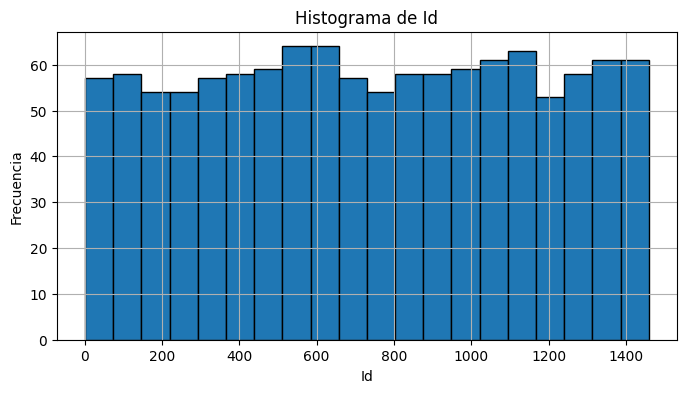

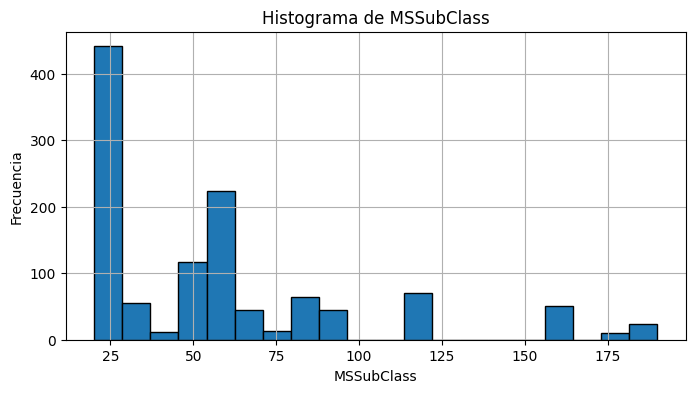

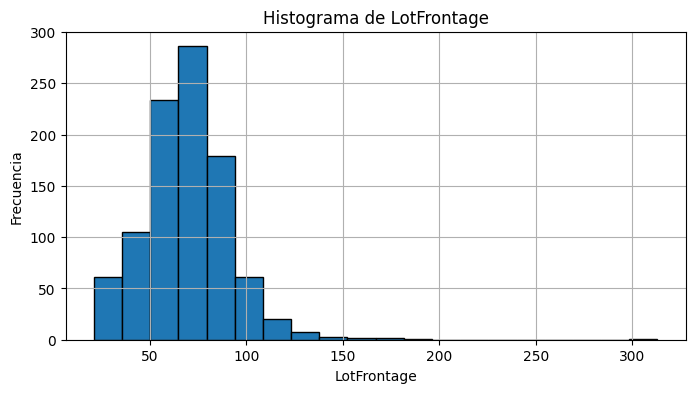

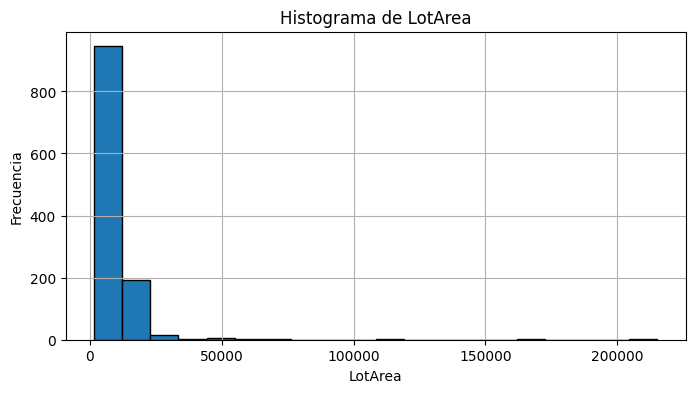

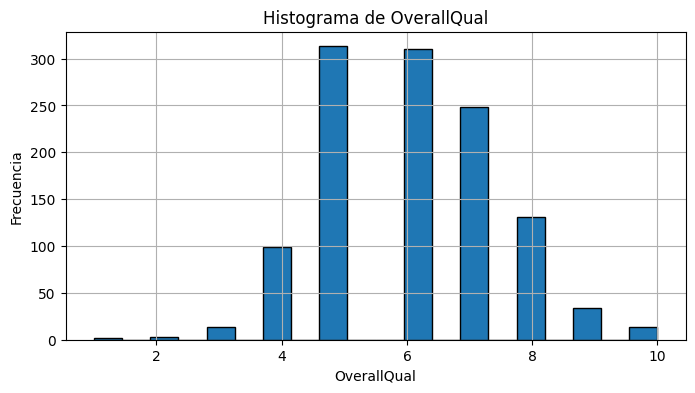

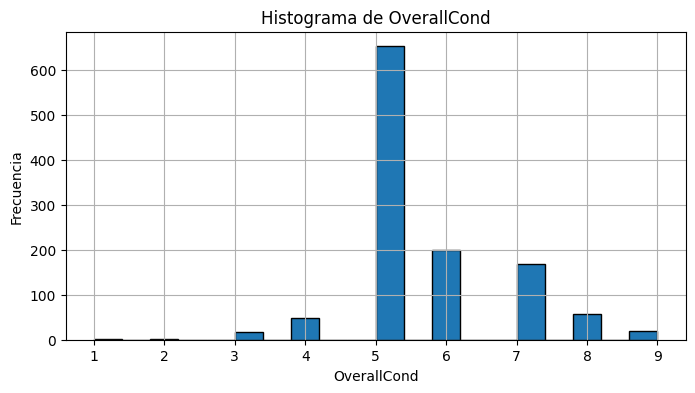

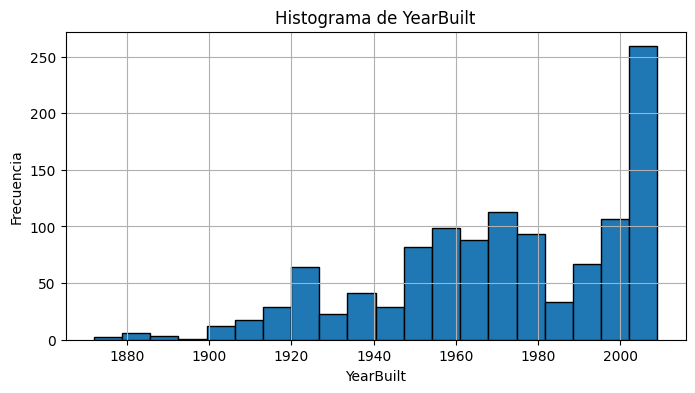

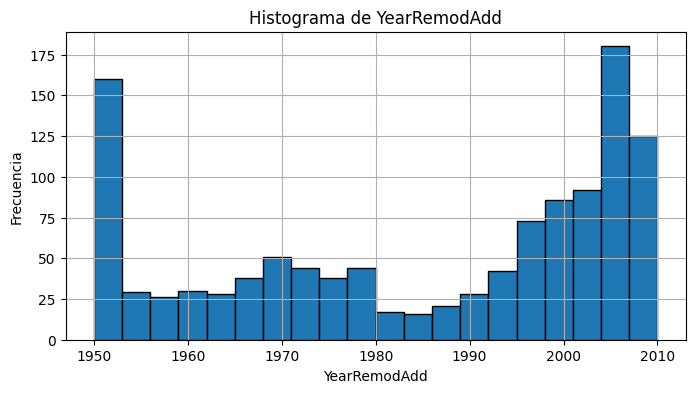

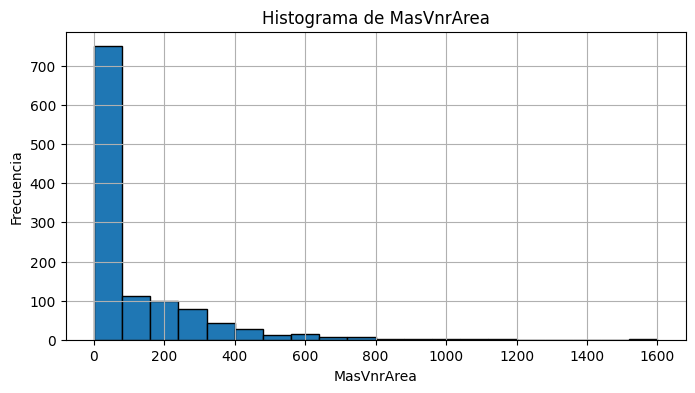

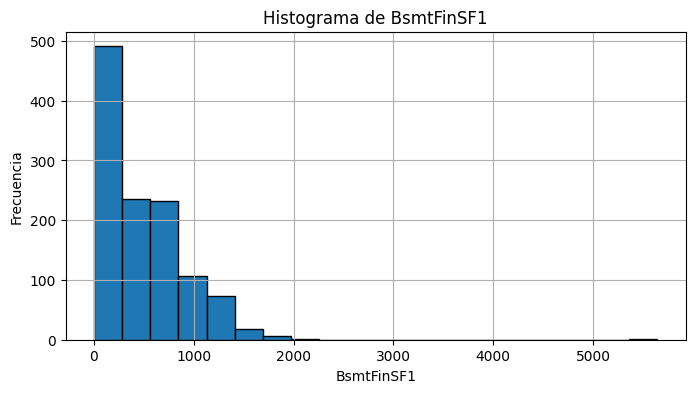

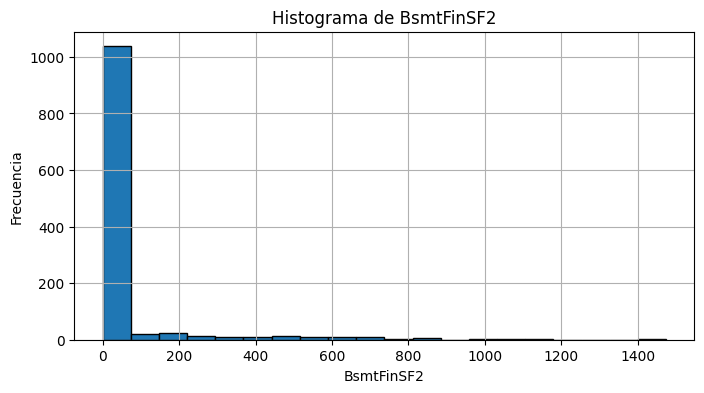

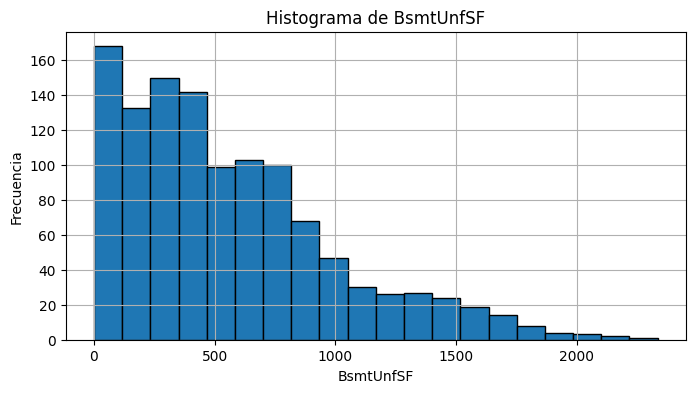

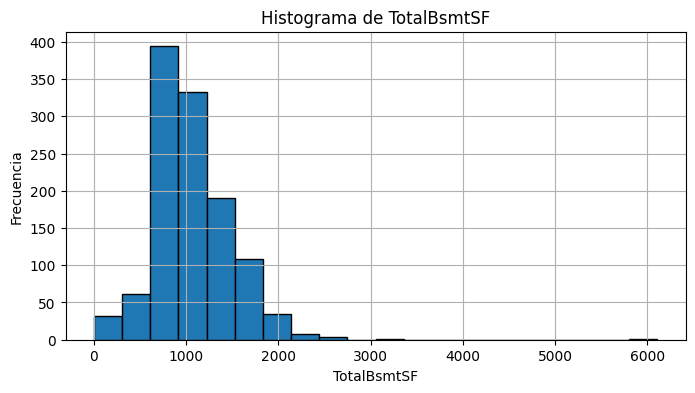

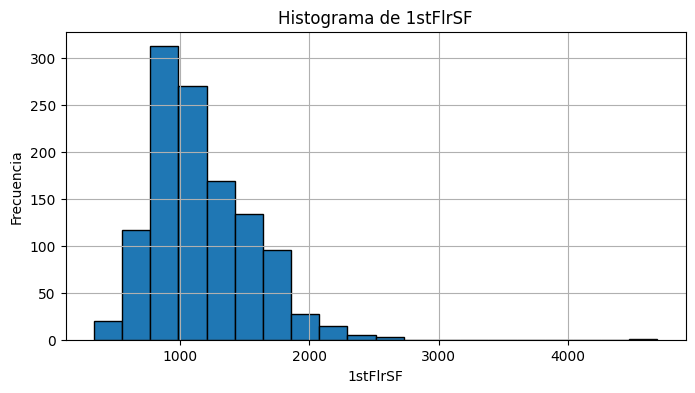

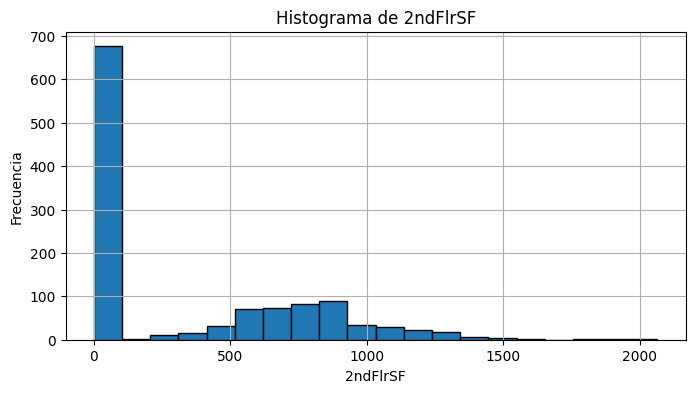

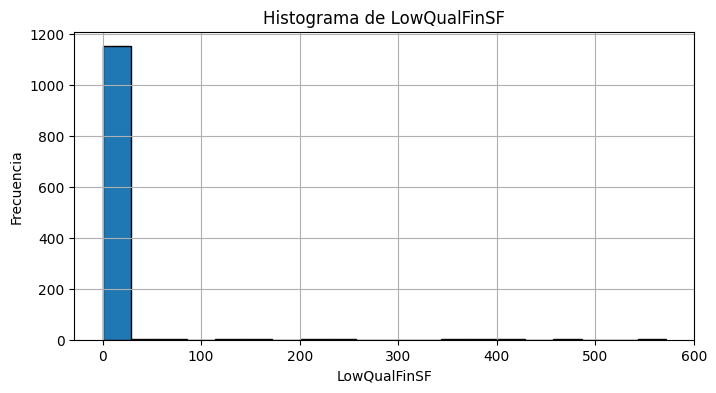

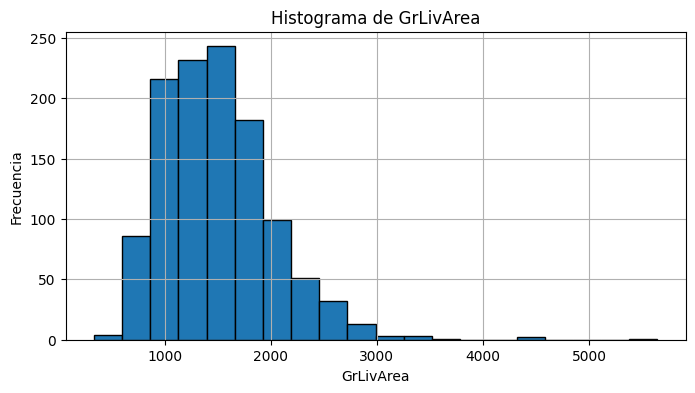

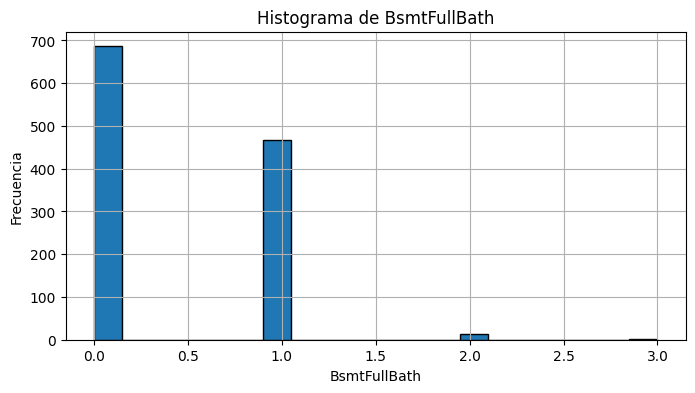

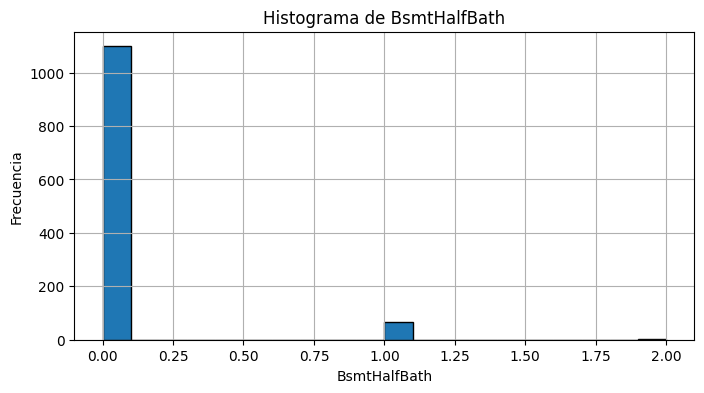

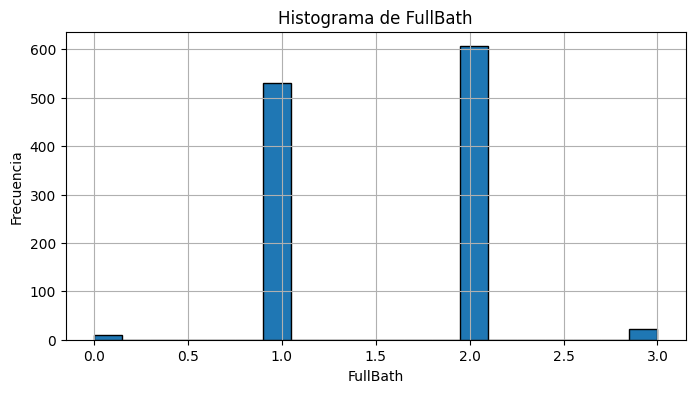

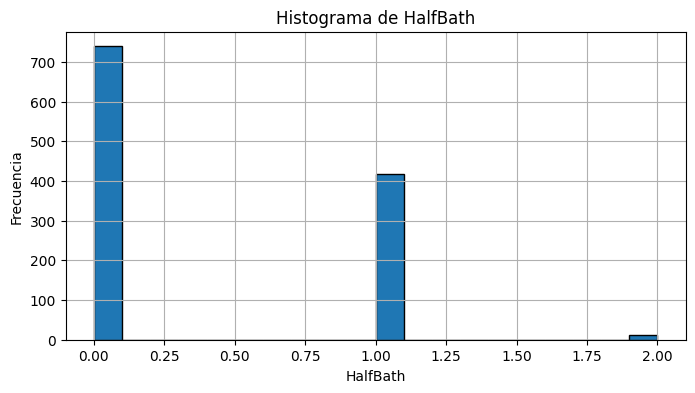

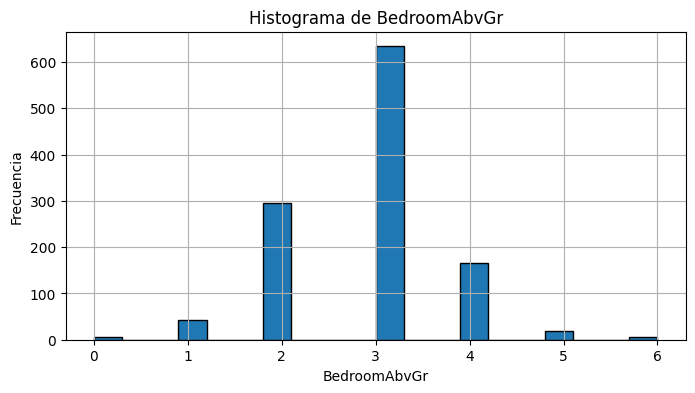

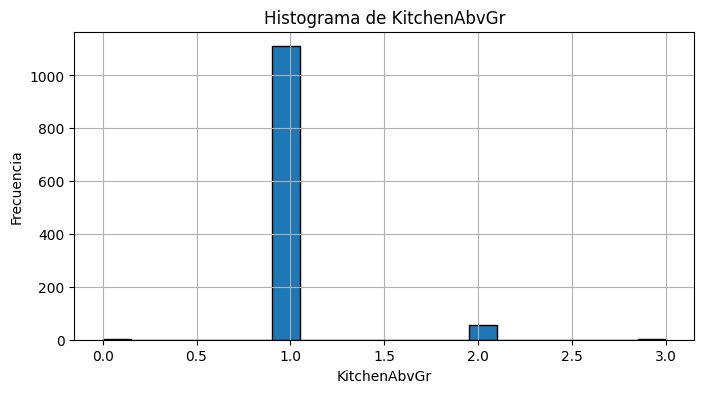

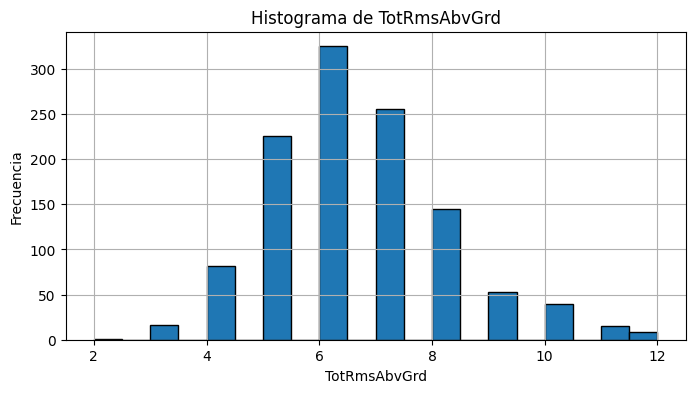

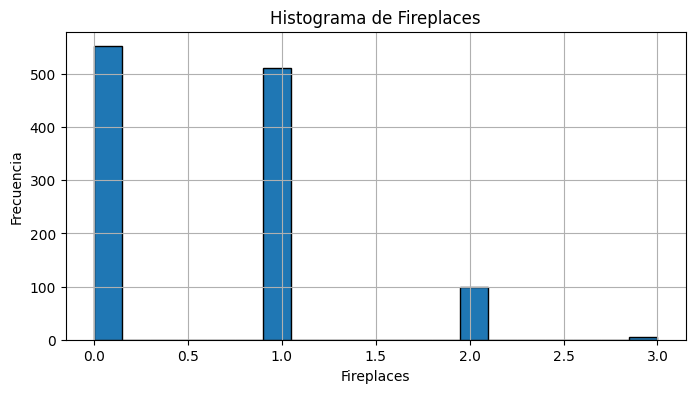

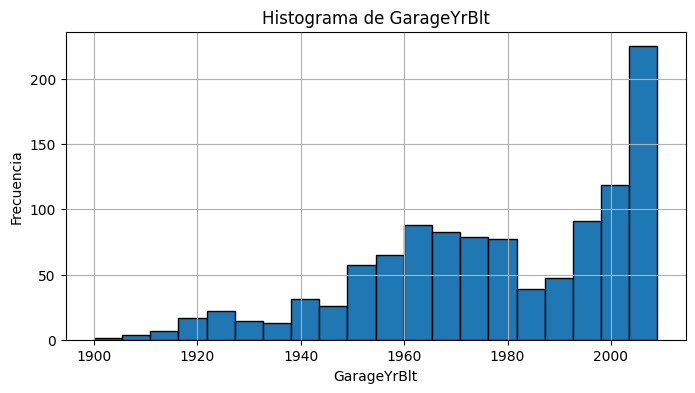

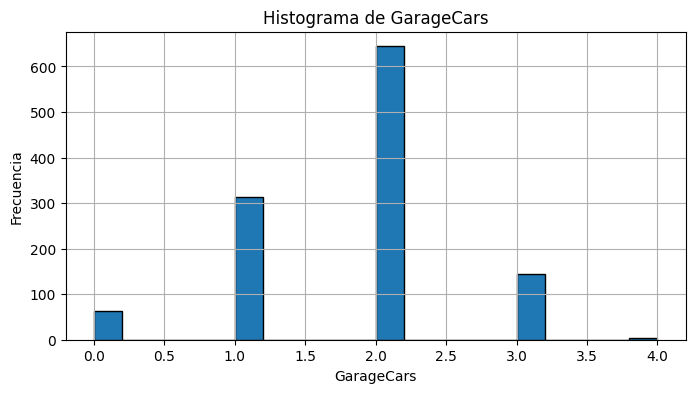

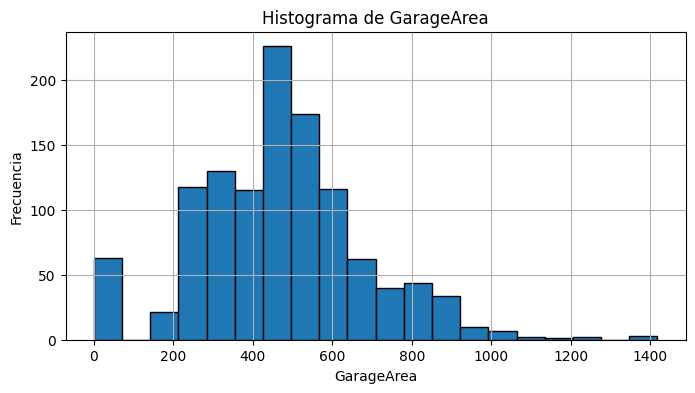

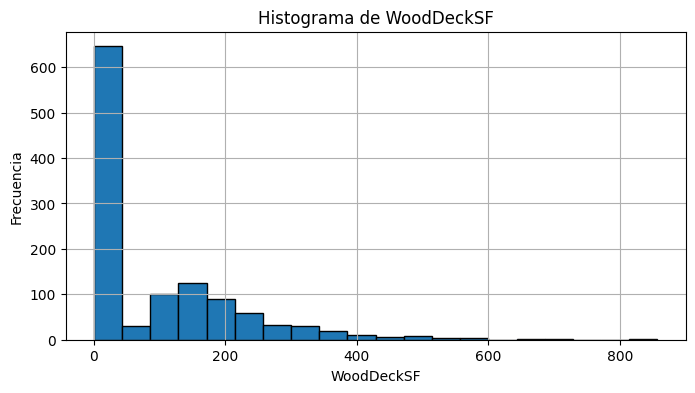

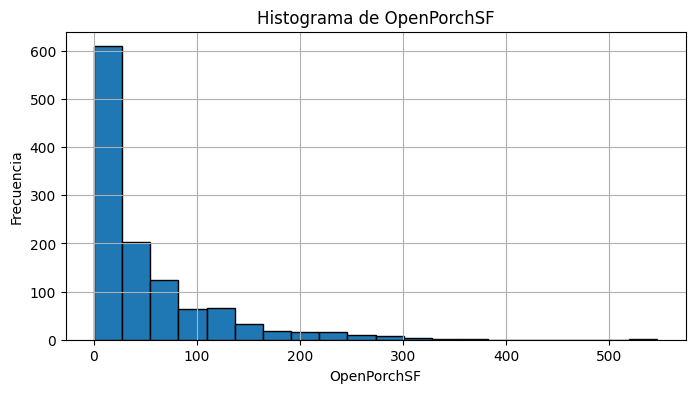

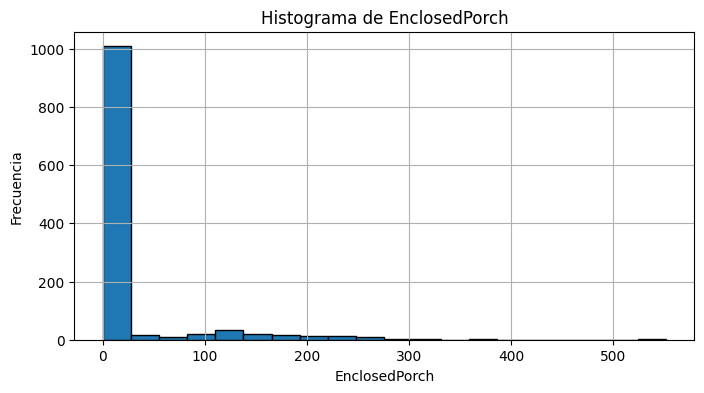

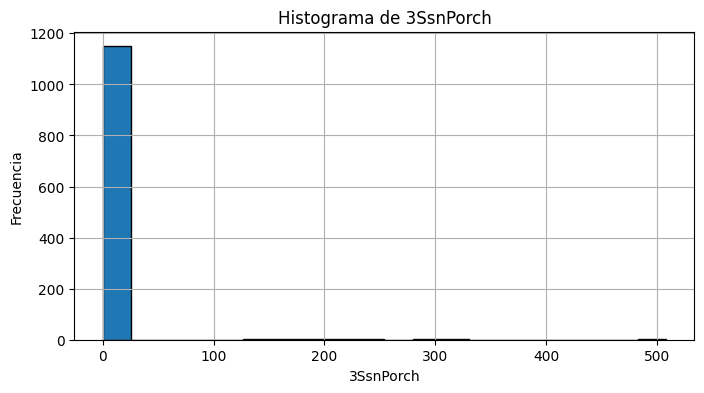

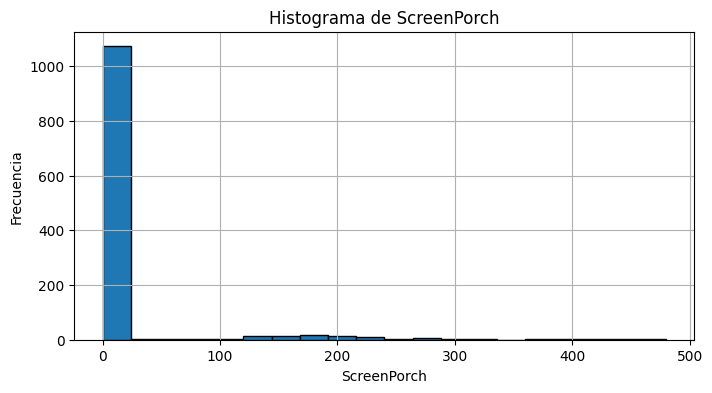

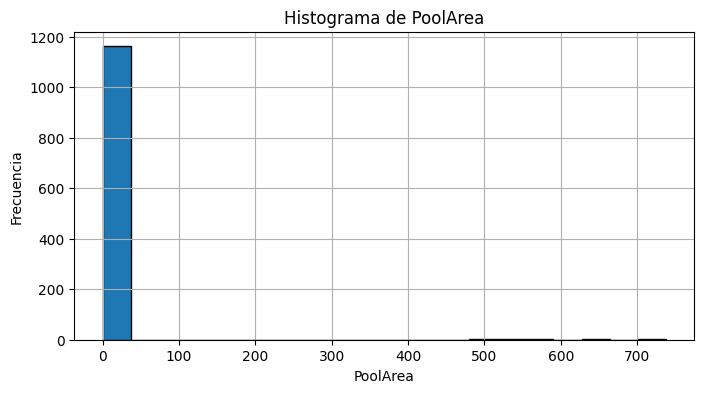

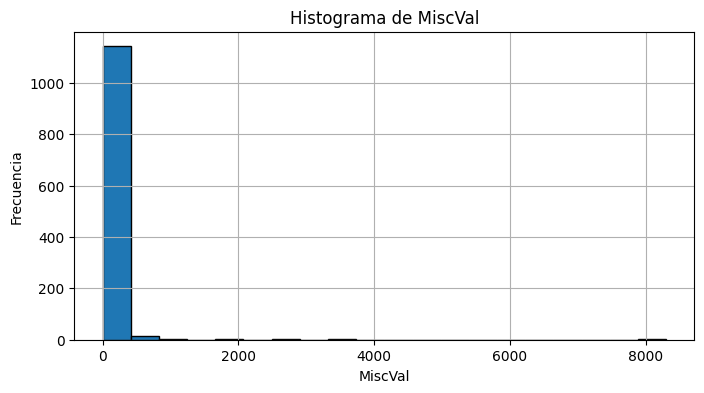

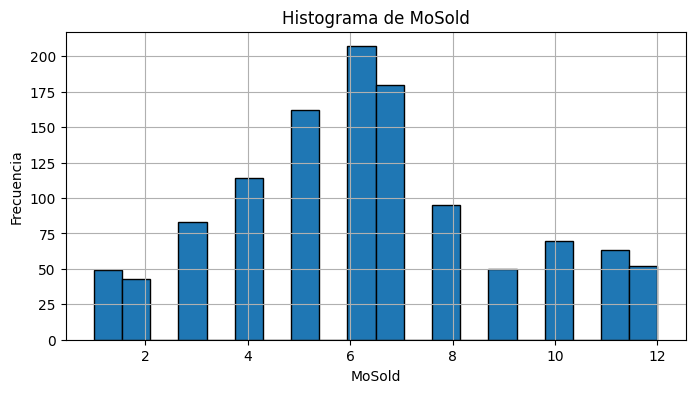

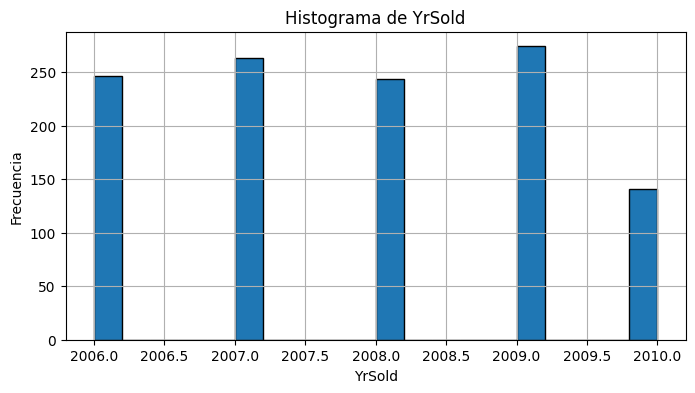

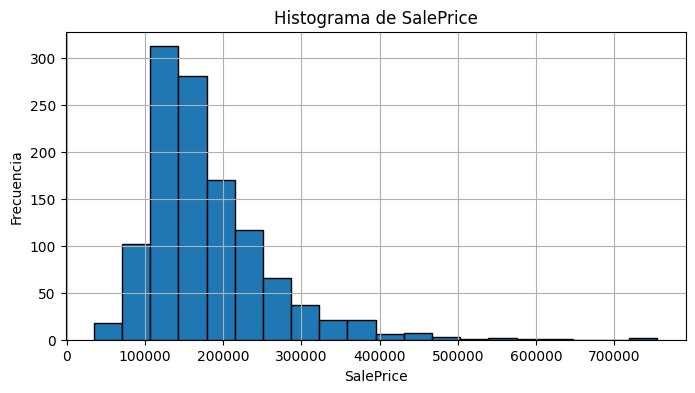

Medidas de tendencia central:
                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1168.000000  1168.000000   963.000000    1168.000000  1168.000000   
mean    736.974315    56.827911    69.332295   10433.303938     6.079623   
std     420.231942    42.876163    23.061827    9970.425218     1.381601   
min       1.000000    20.000000    21.000000    1477.000000     1.000000   
25%     381.750000    20.000000    59.000000    7500.000000     5.000000   
50%     733.500000    50.000000    69.000000    9378.500000     6.000000   
75%    1100.250000    70.000000    80.000000   11500.000000     7.000000   
max    1459.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1168.000000  1168.000000   1168.000000  1161.000000  1168.000000  ...   
mean      5.594178  1971.212329   1984.255993   104.167959   451.277397  ...   
std       1.112229    30.019550     20.915926

In [14]:
import pandas as pd
import matplotlib.pyplot as plt


numeric_columns = [col for col in train_d.columns if train_d[col].dtype != 'object']

# Calcular medidas de tendencia central
central_tendency = train_d[numeric_columns].describe()

# Crear histogramas
for column in numeric_columns:
    plt.figure(figsize=(8, 4))
    plt.hist(train_d[column], bins=20, edgecolor='k')
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()

# Mostrar medidas de tendencia central
print("Medidas de tendencia central:")
print(central_tendency)


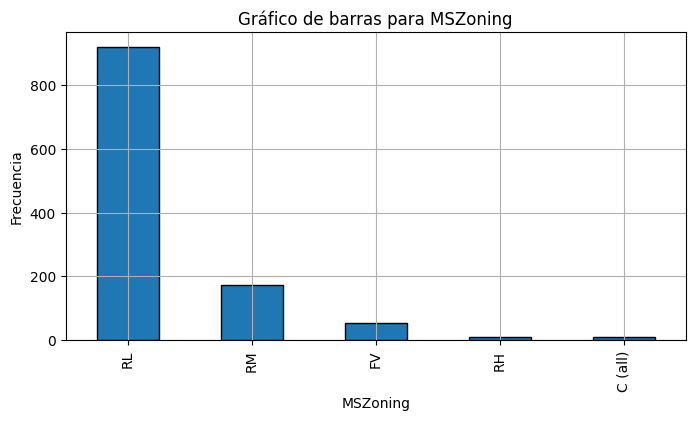

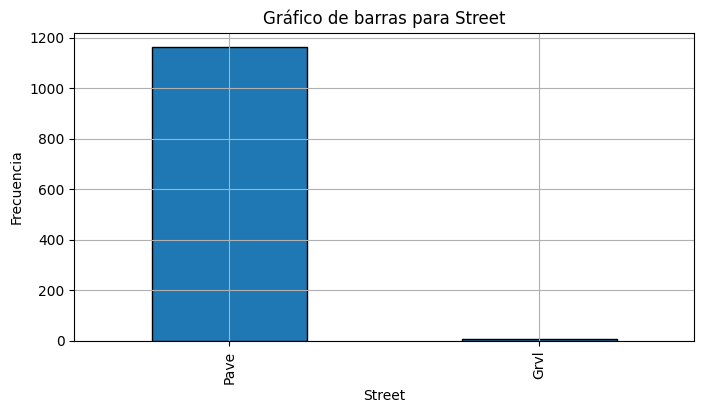

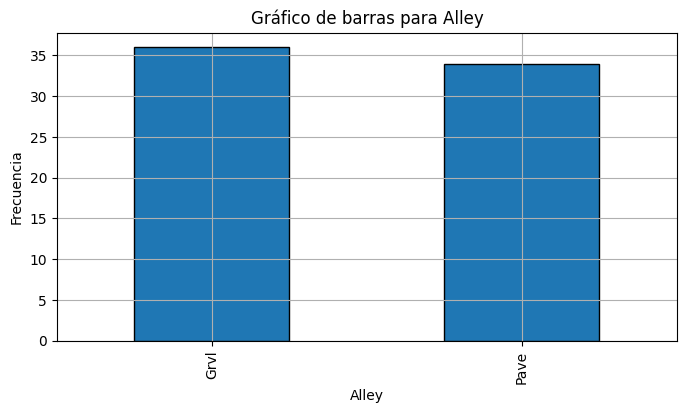

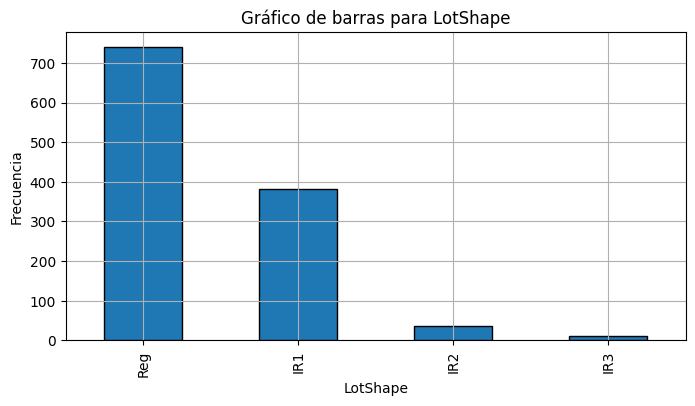

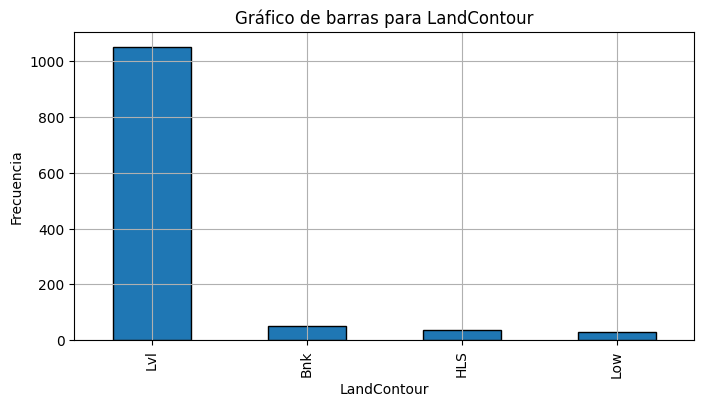

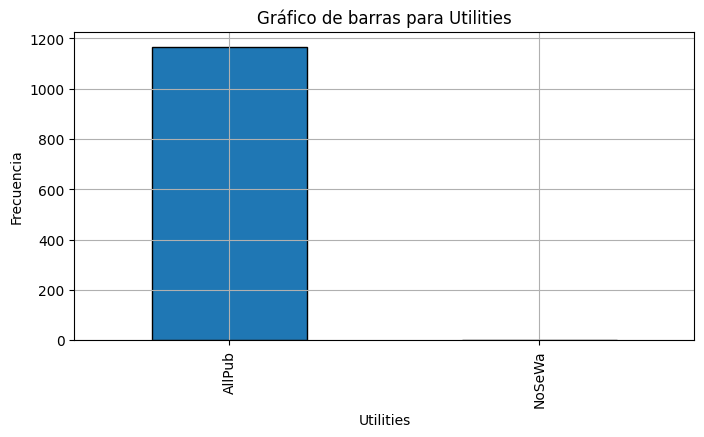

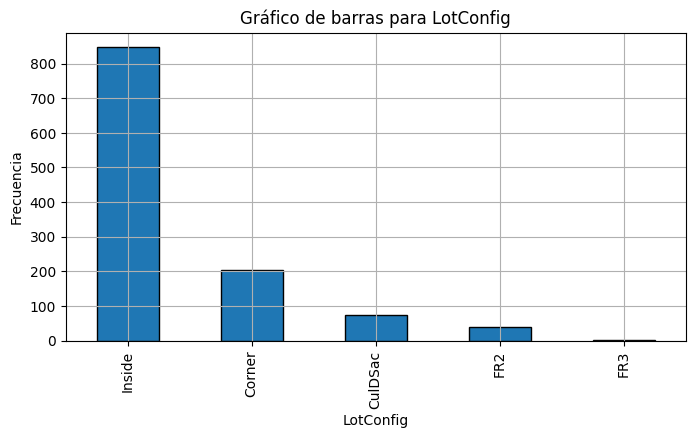

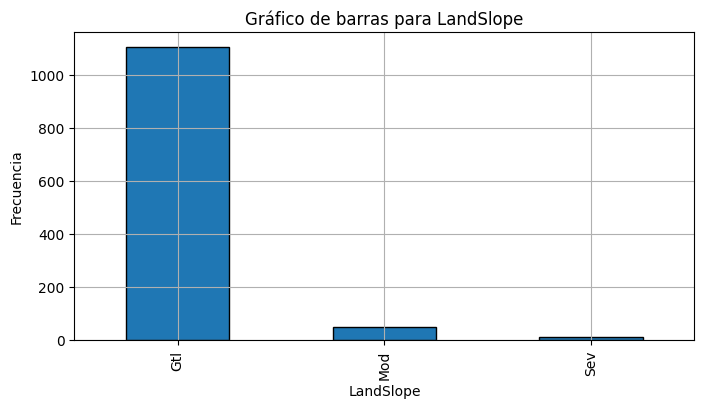

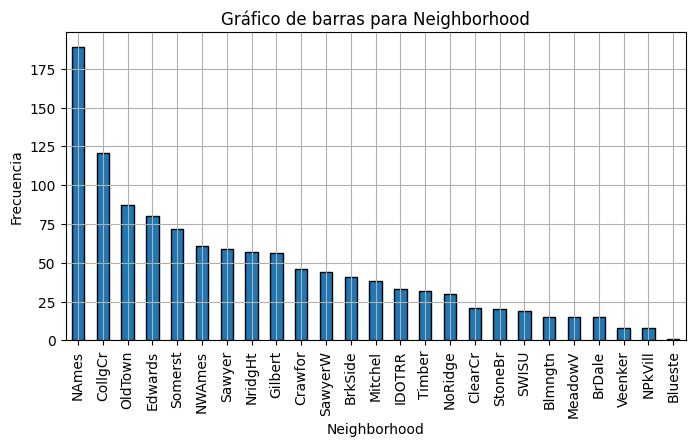

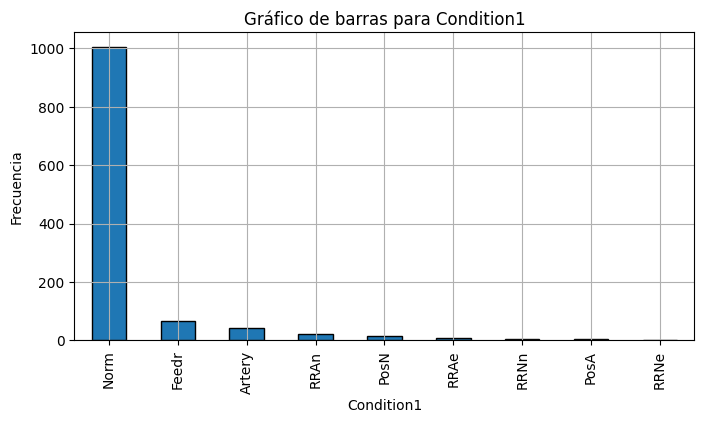

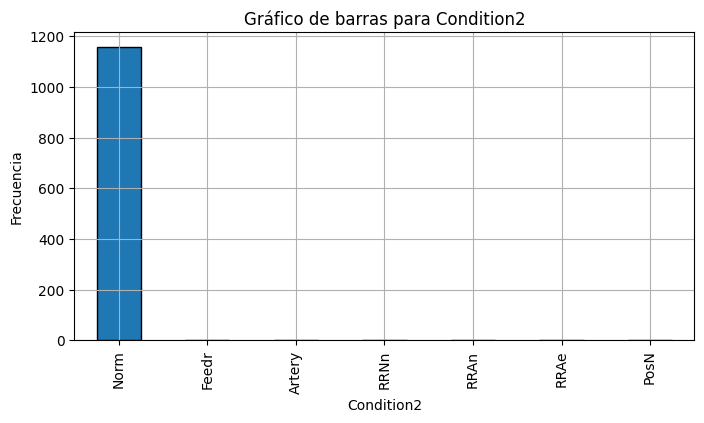

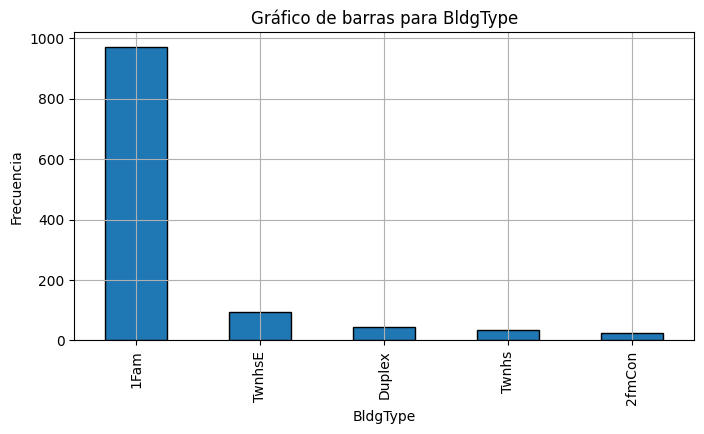

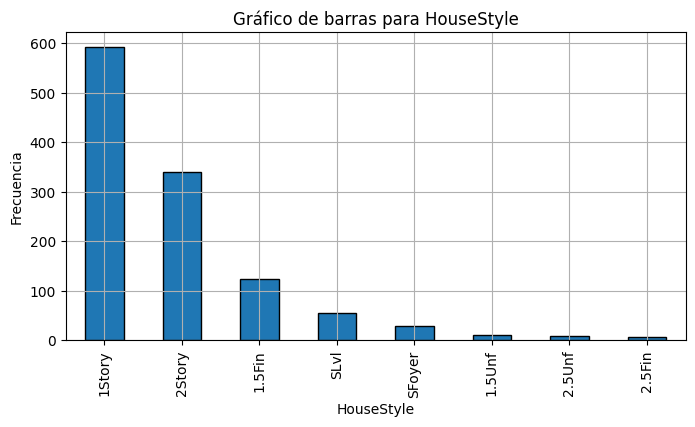

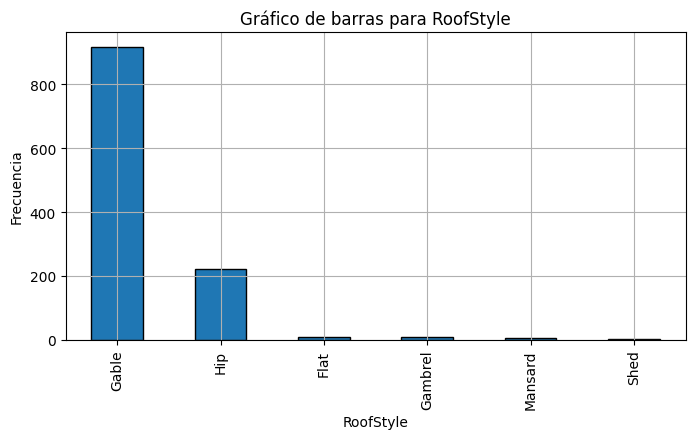

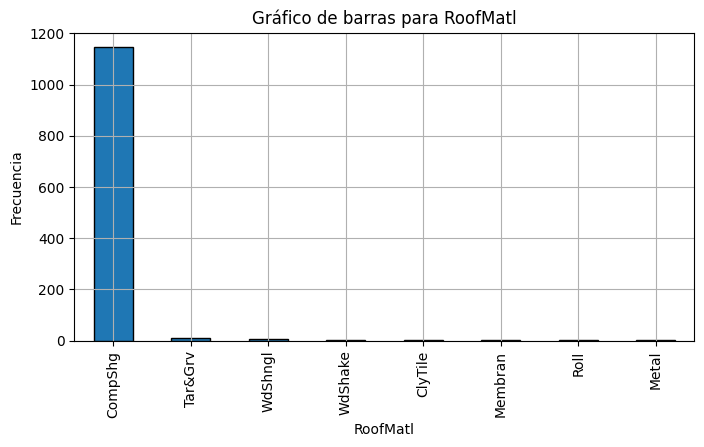

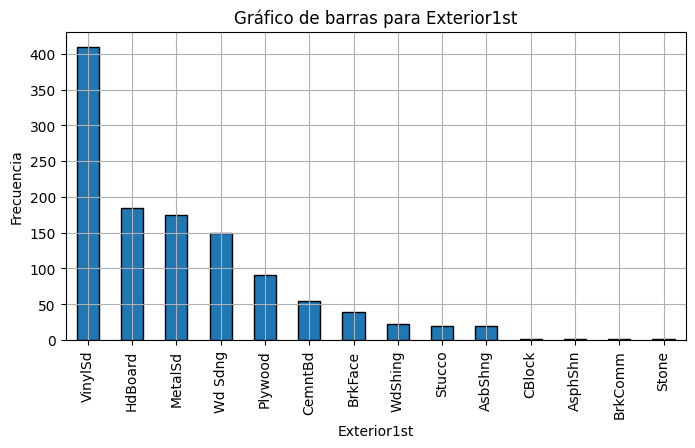

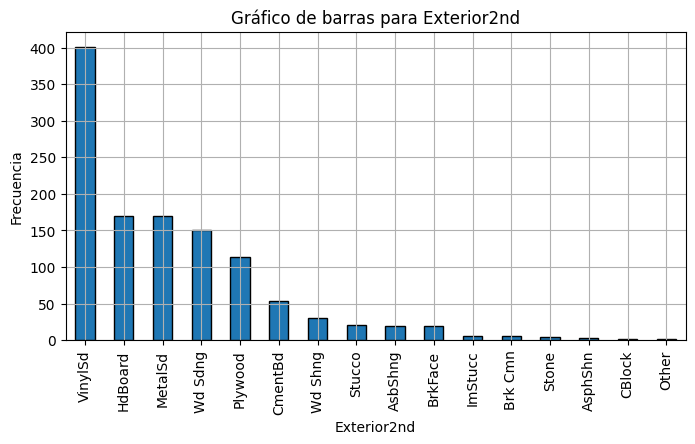

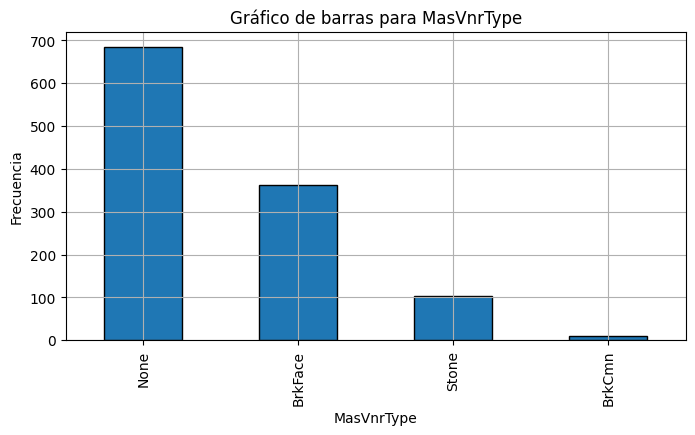

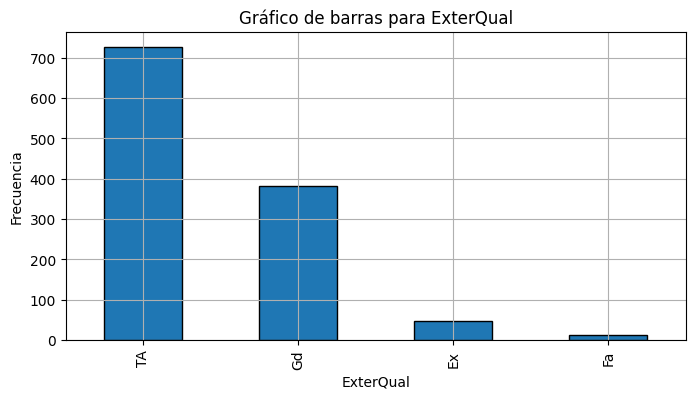

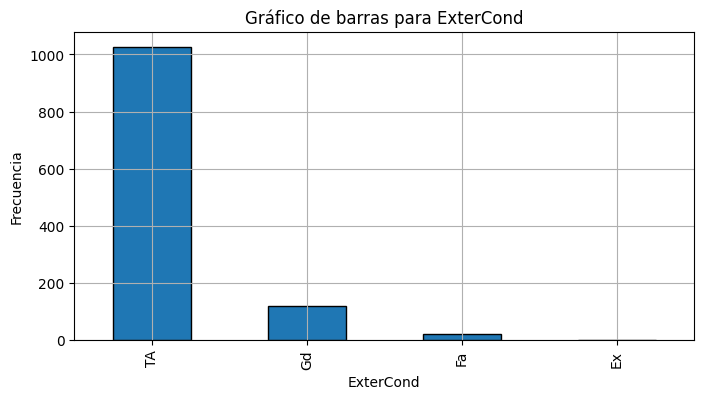

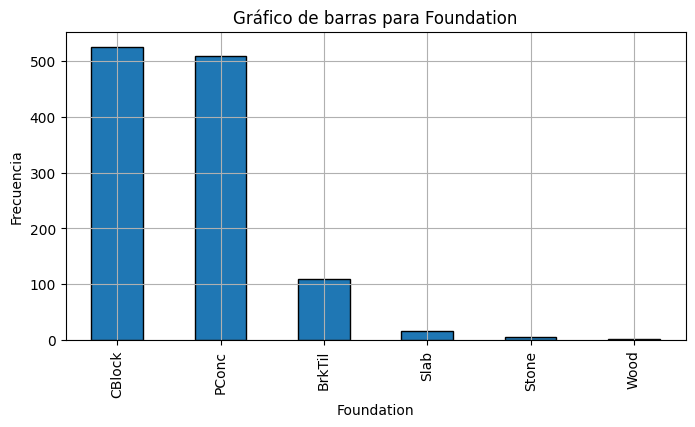

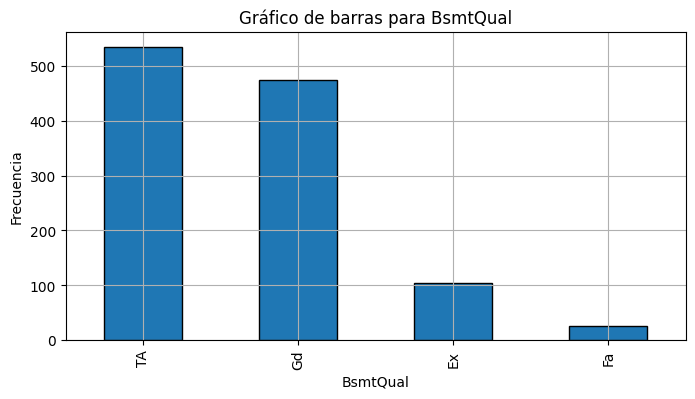

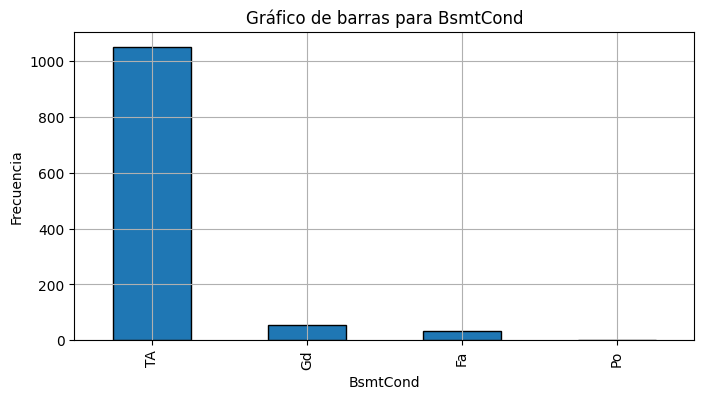

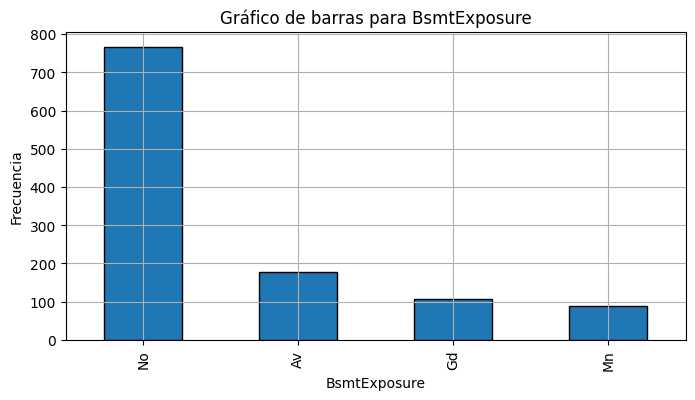

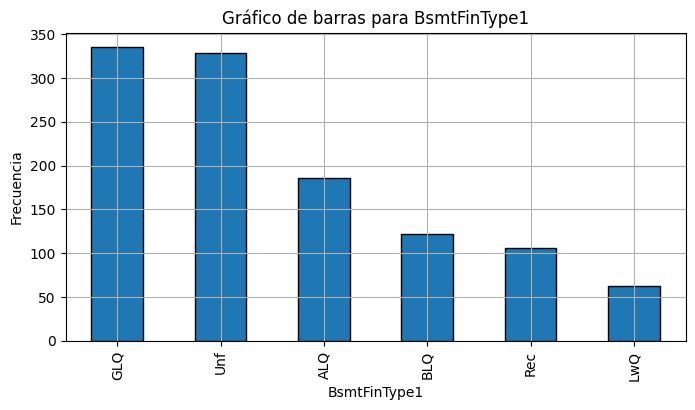

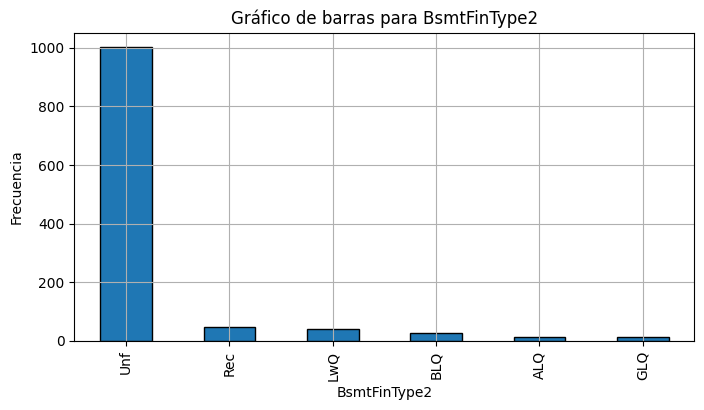

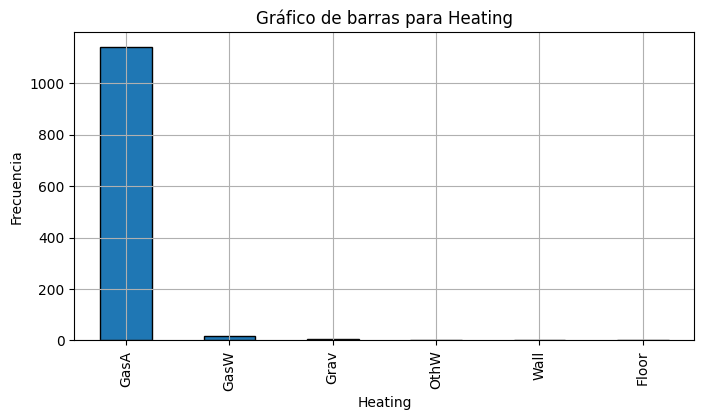

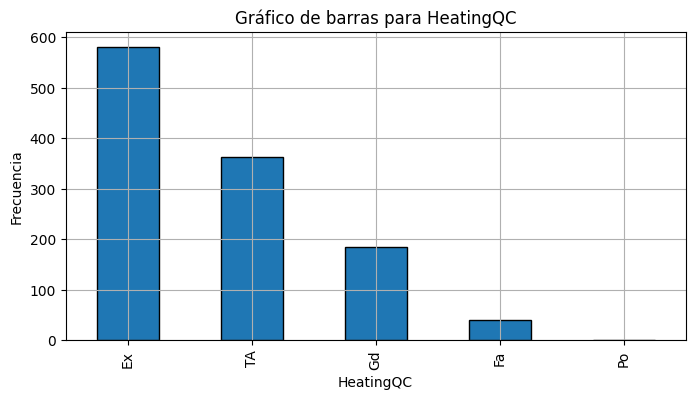

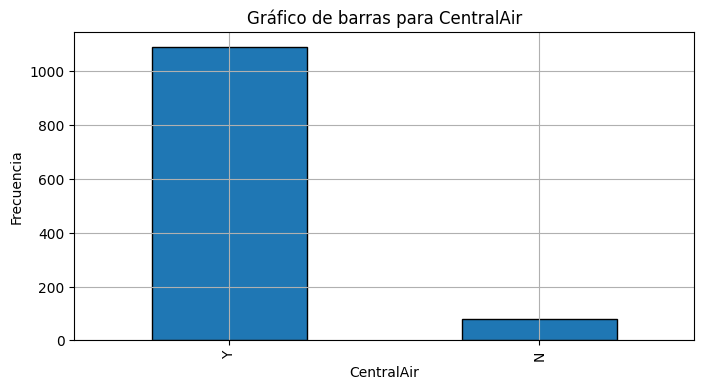

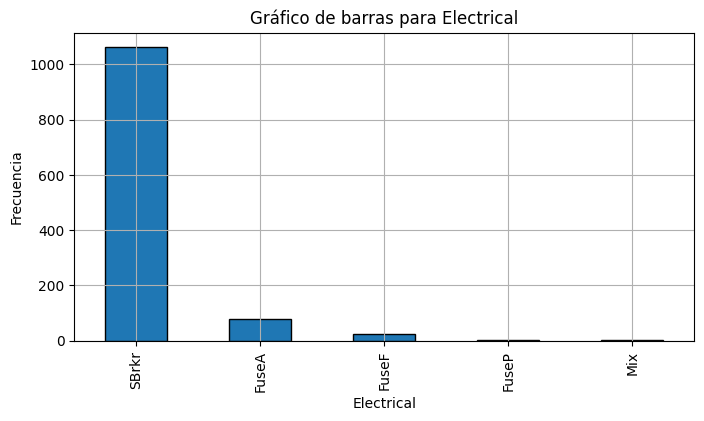

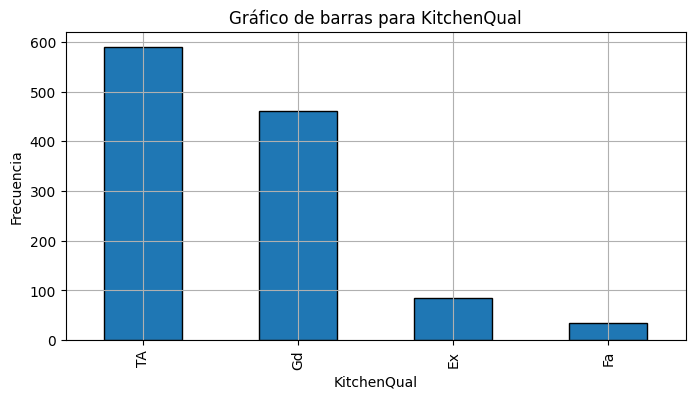

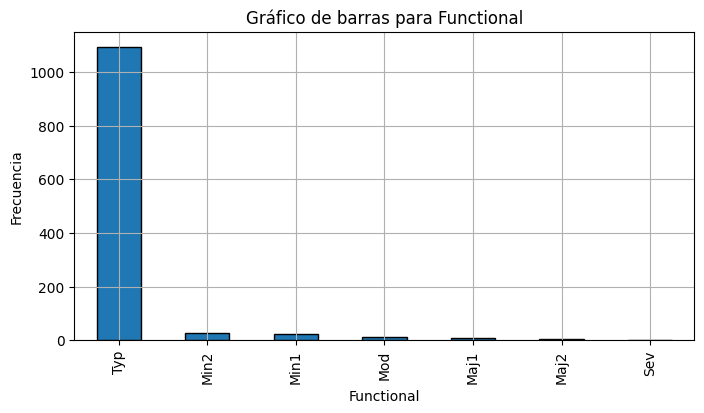

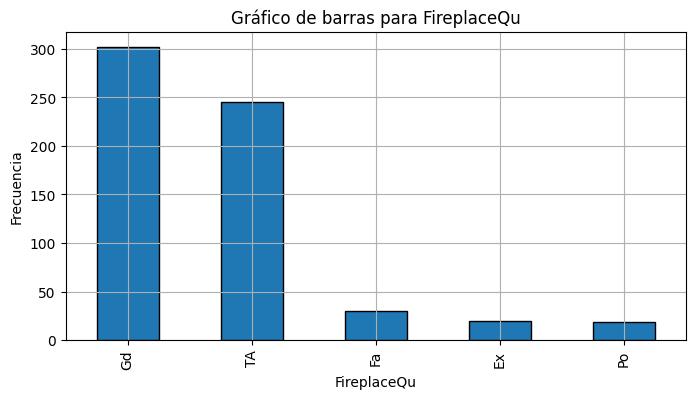

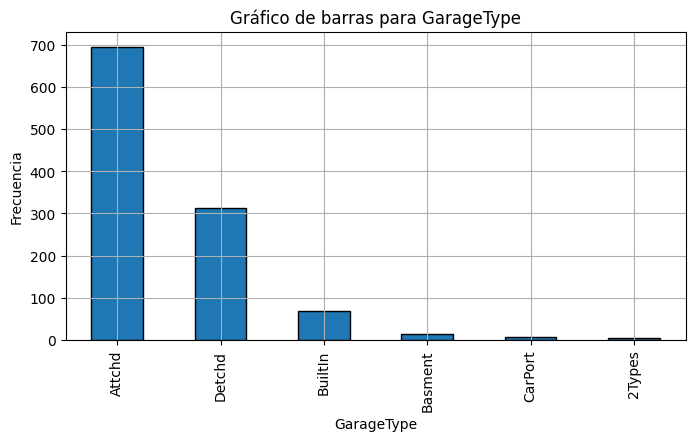

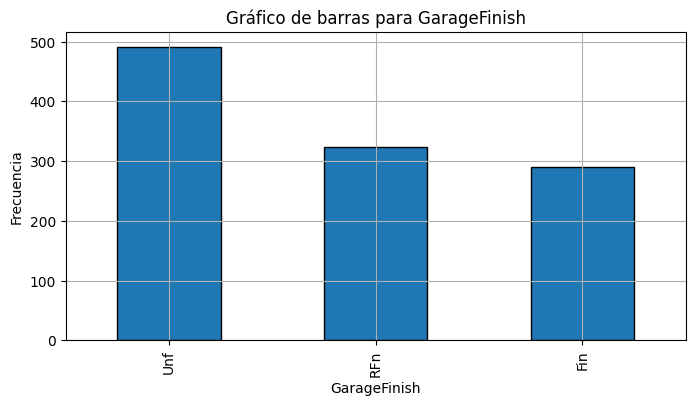

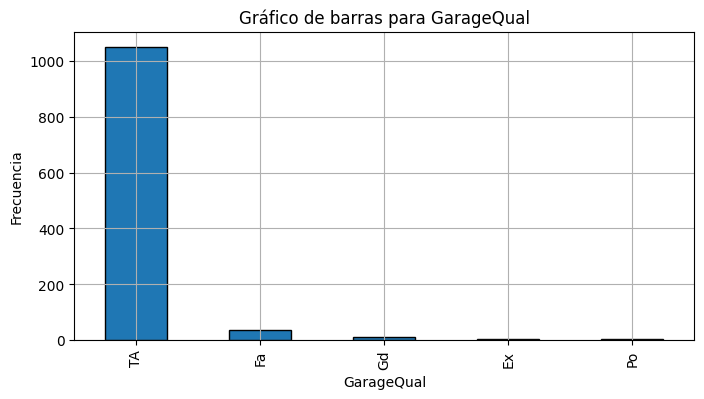

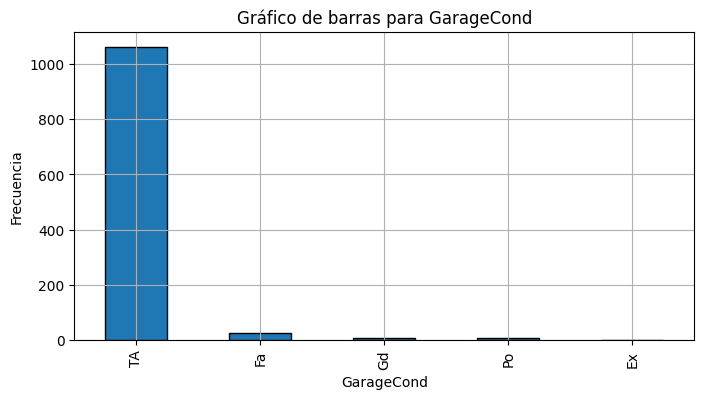

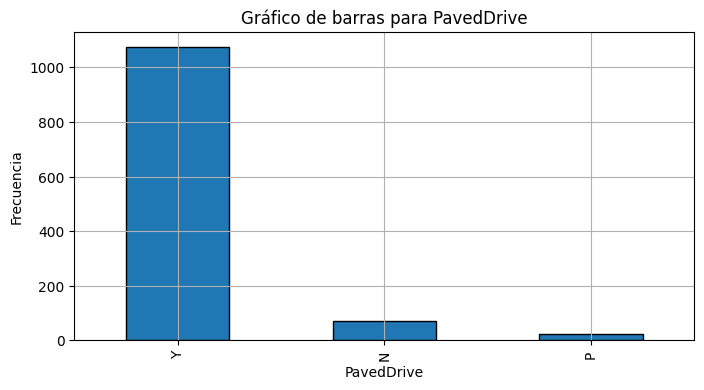

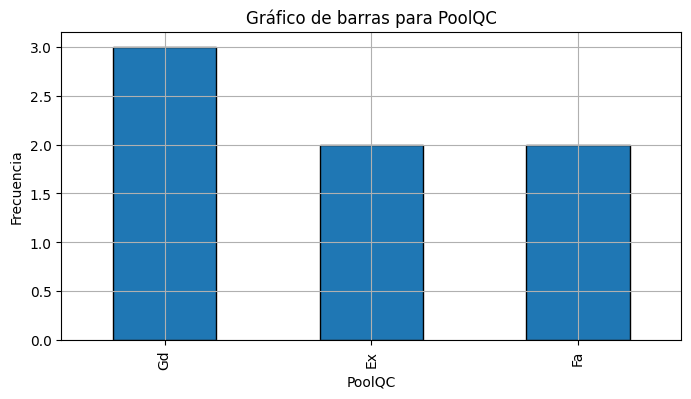

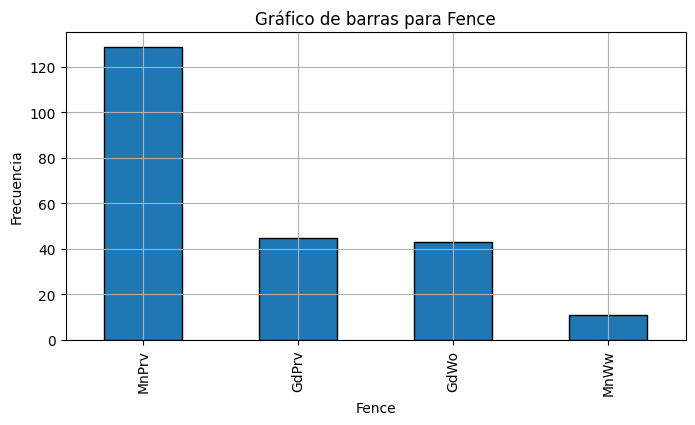

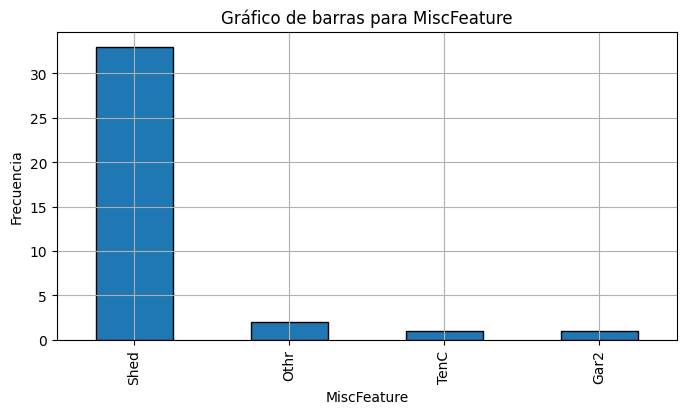

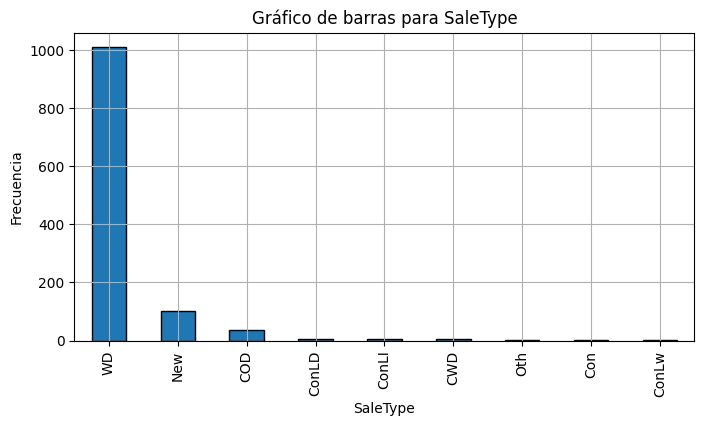

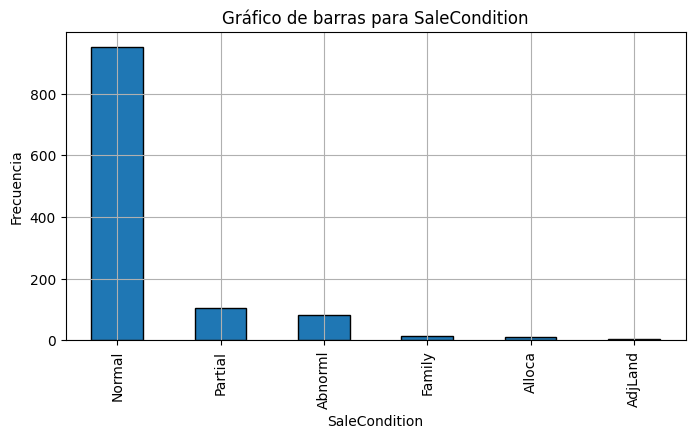

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado data_hp
categorical_columns = [col for col in train_d.columns if train_d[col].dtype == 'object']

# Crear gráficos de barras para variables categóricas
for column in categorical_columns:
    plt.figure(figsize=(8, 4))
    train_d[column].value_counts().plot(kind='bar', edgecolor='k')
    plt.title(f'Gráfico de barras para {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()




Matriz de correlación

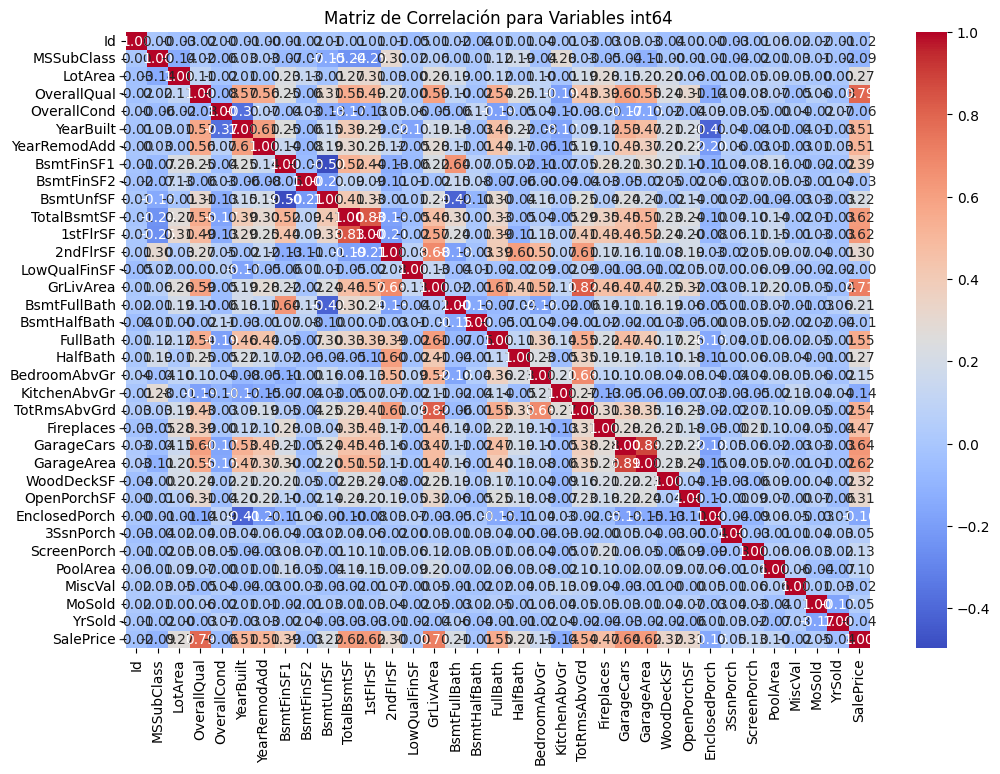

In [16]:
int64_variables = train_d.select_dtypes(include=['int64'])

correlation_matrix = int64_variables.corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación para Variables int64")
plt.show()

In [17]:
profile = ProfileReport(train_d)

NameError: name 'ProfileReport' is not defined

# Conclusiones de EDA y Profiling:

Las siguientes variables necesitan ser normalizadas por tener outliers:

                                        YearRemodAdd
                                        MSSubClass
                                        2ndFlrSF
                                        LowQualFinSF
                                        WoodDeckSF
                                        OpenPorchSF
                                        EnclosedPorch


Las siguientes son candidatas a clasificar:
                                        
                                        YearRemodAdd
                                        MSSubClass
                                        2ndFlrSF
                                        LowQualFinSF
                                        WoodDeckSF
                                        OpenPorchSF
                                        EnclosedPorch


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

numeric_columns = train_d.select_dtypes(include=['number'])

scaler = StandardScaler()


train_d[numeric_columns.columns] = scaler.fit_transform(numeric_columns)



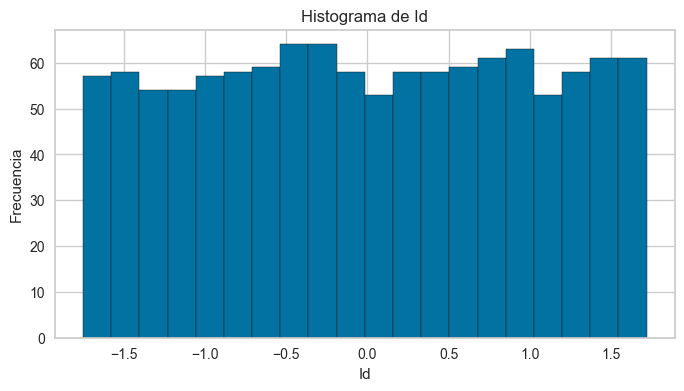

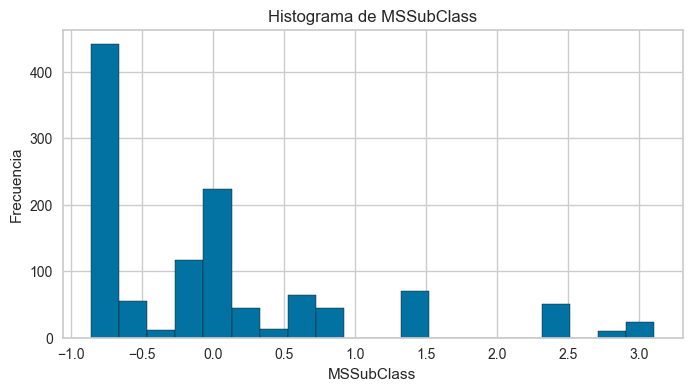

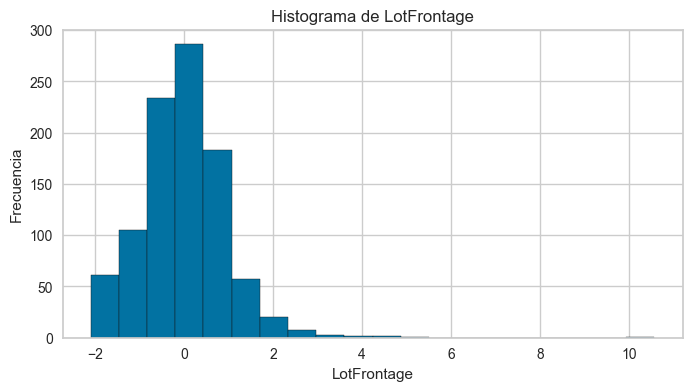

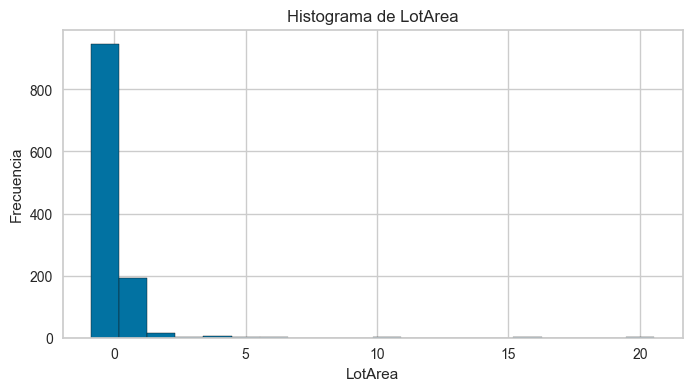

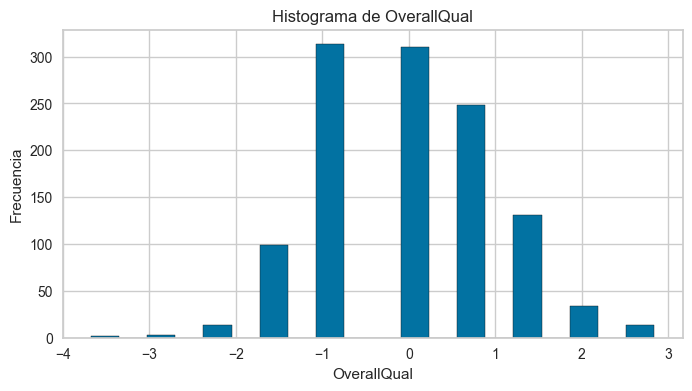

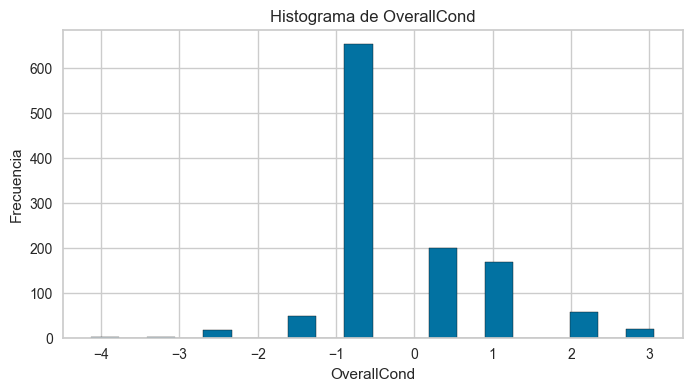

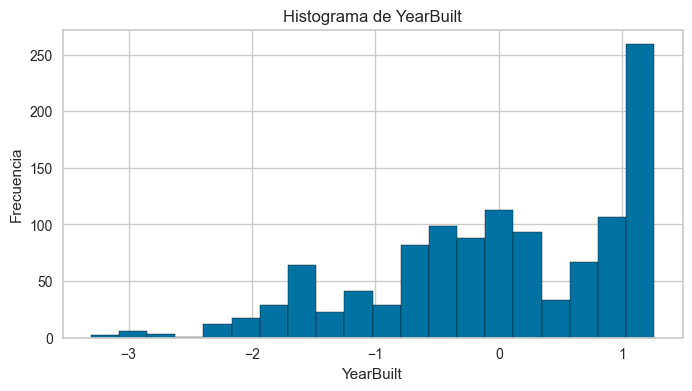

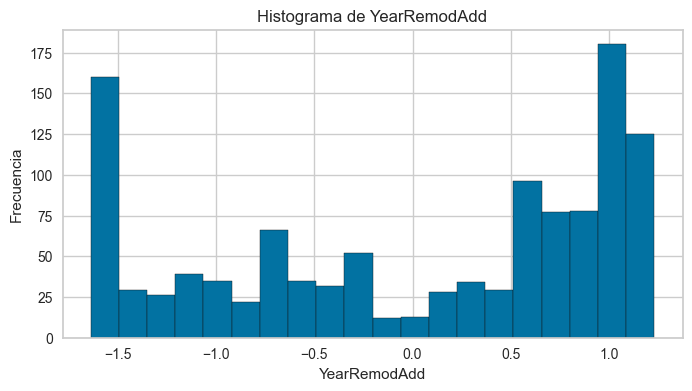

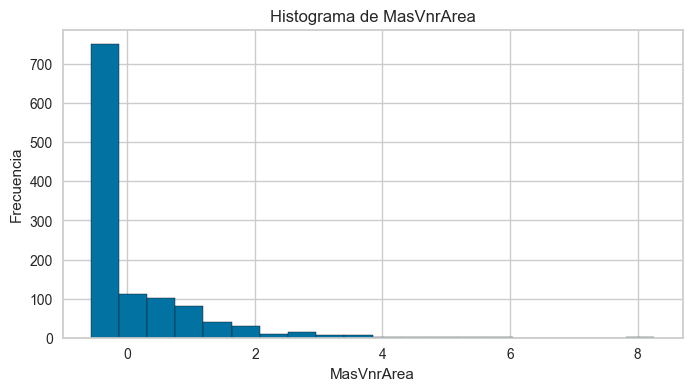

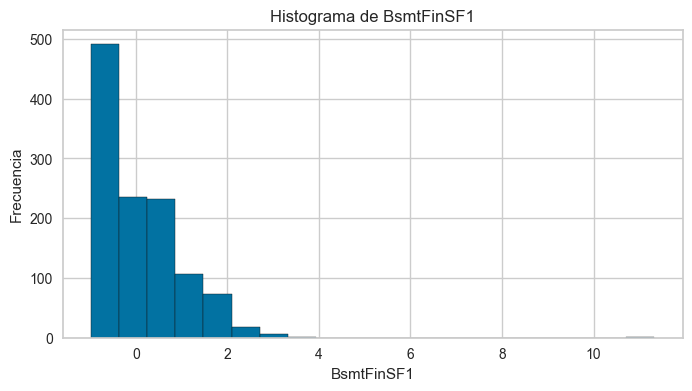

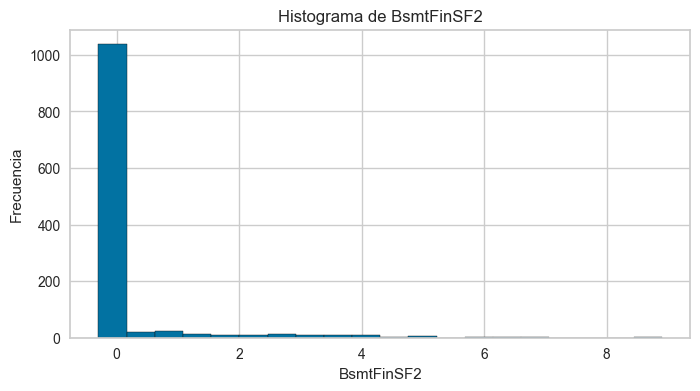

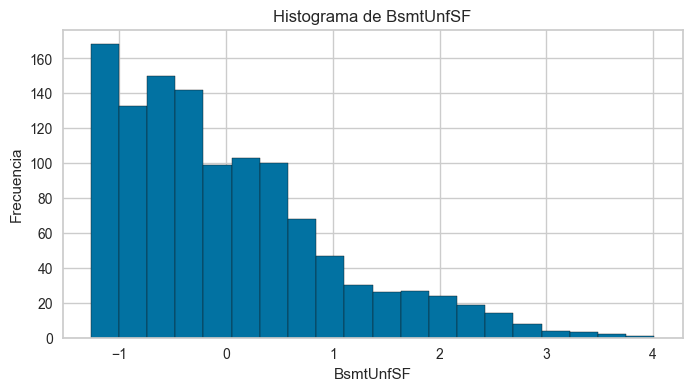

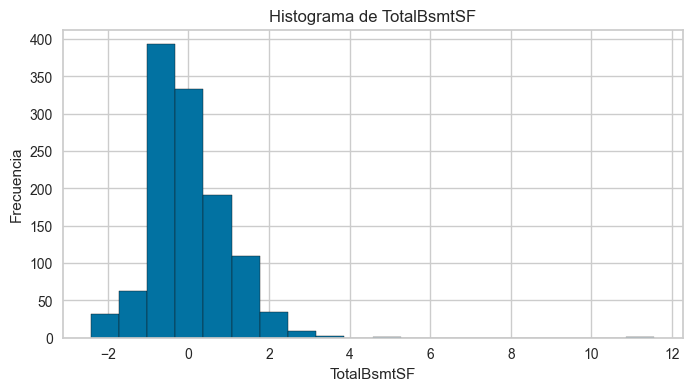

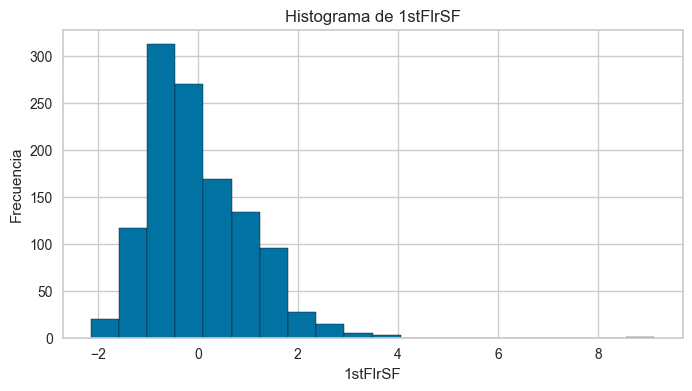

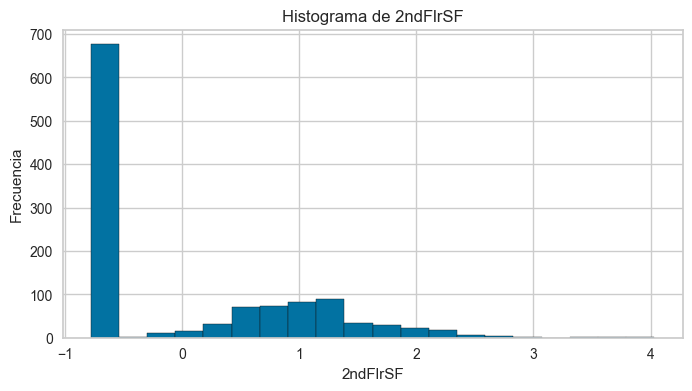

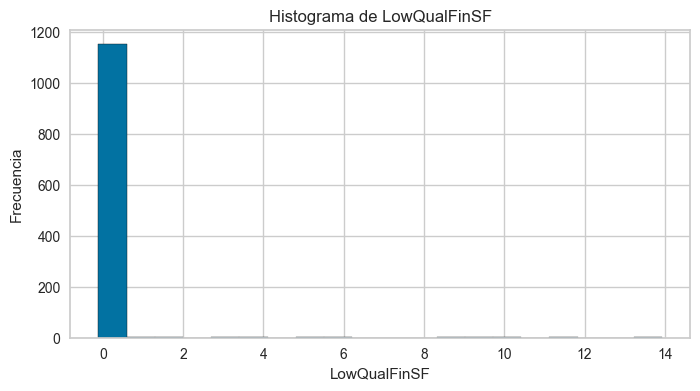

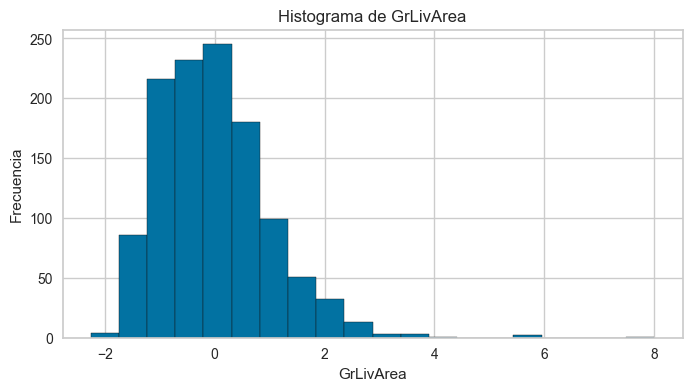

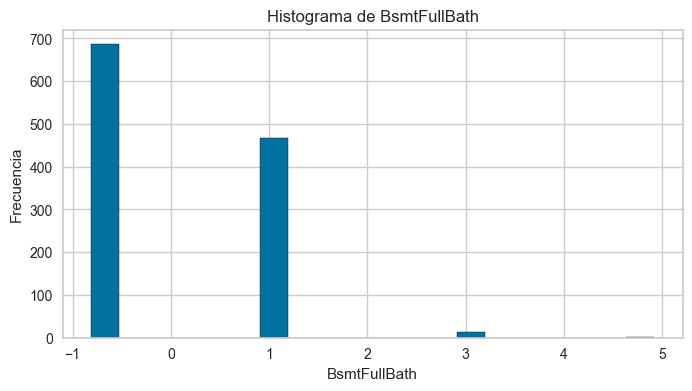

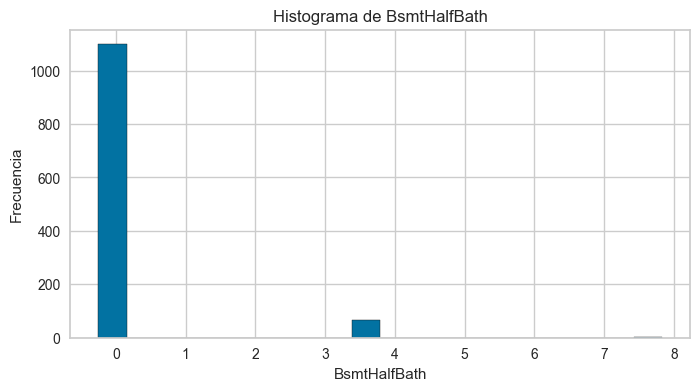

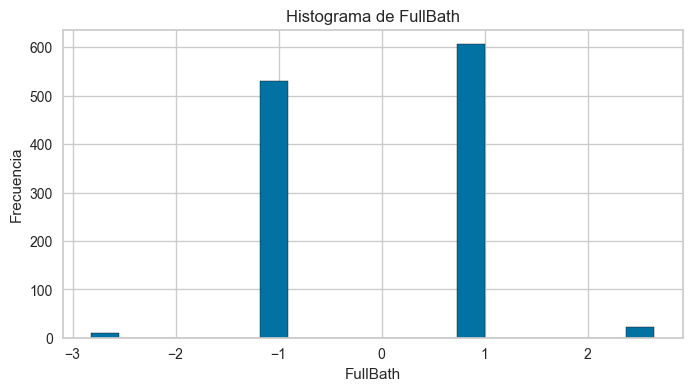

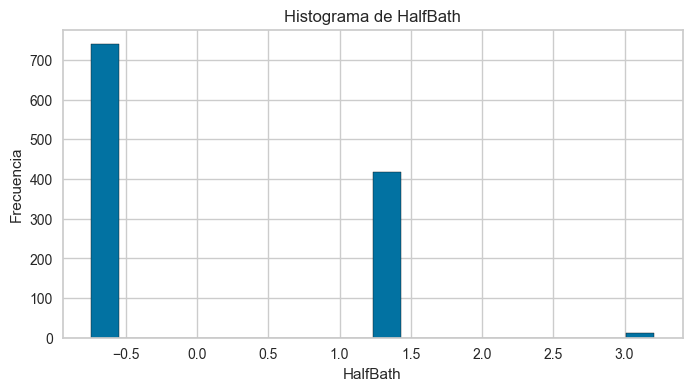

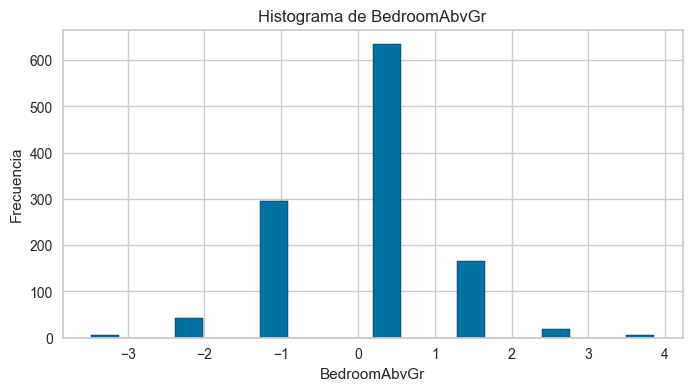

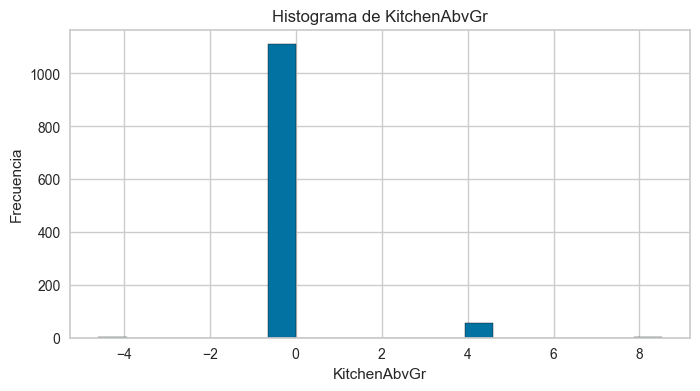

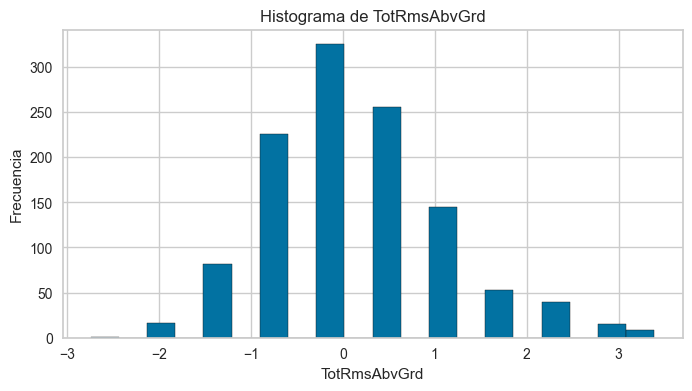

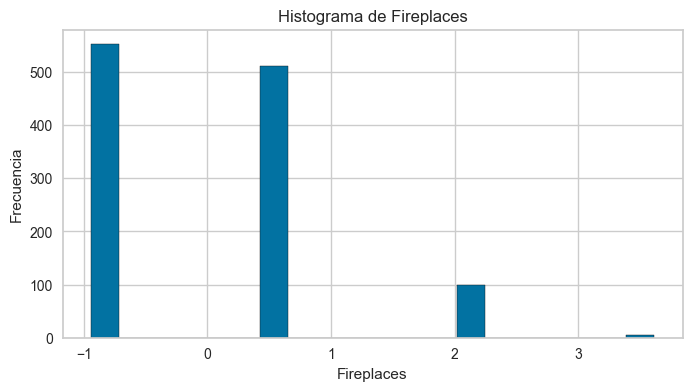

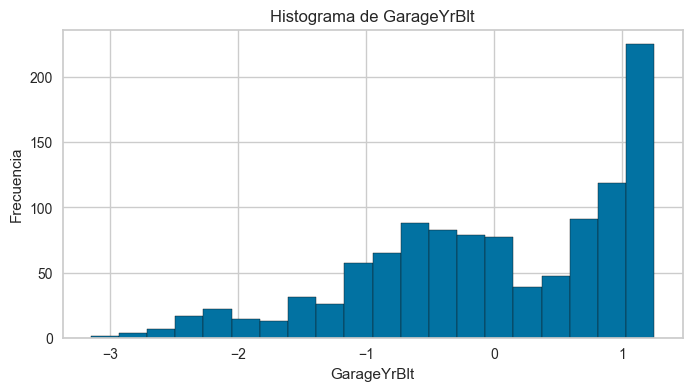

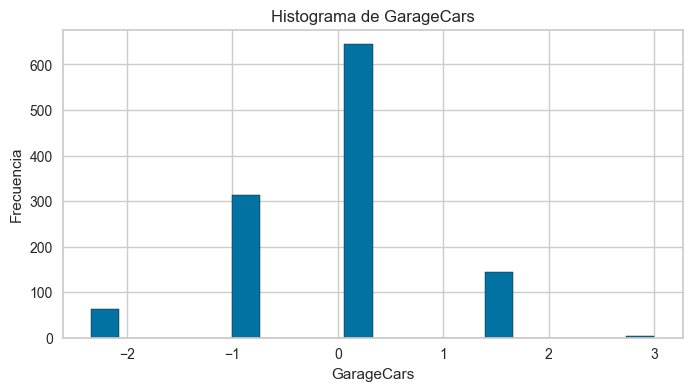

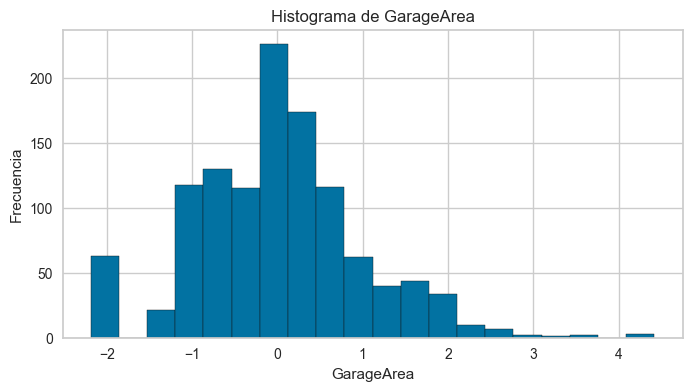

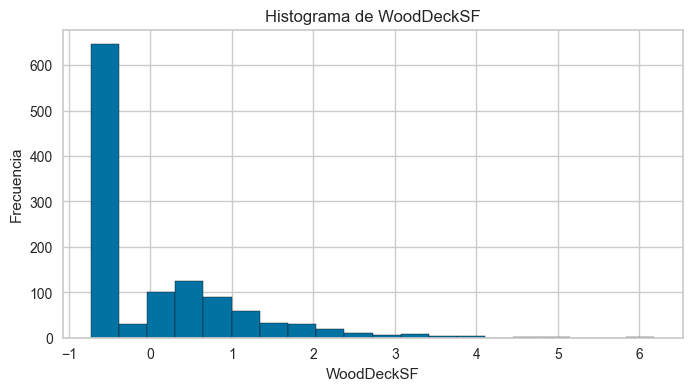

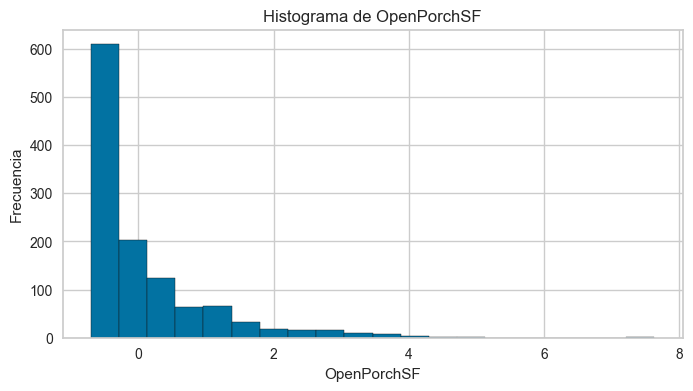

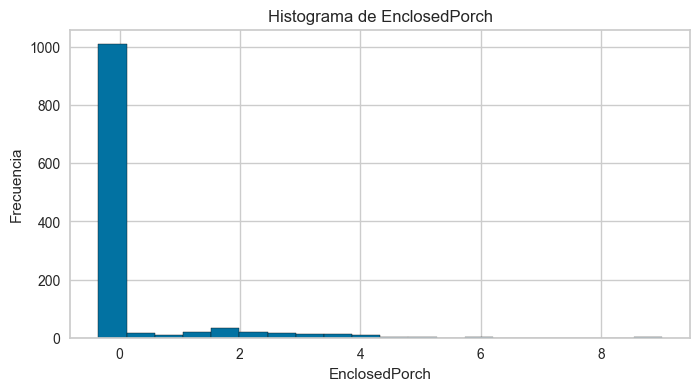

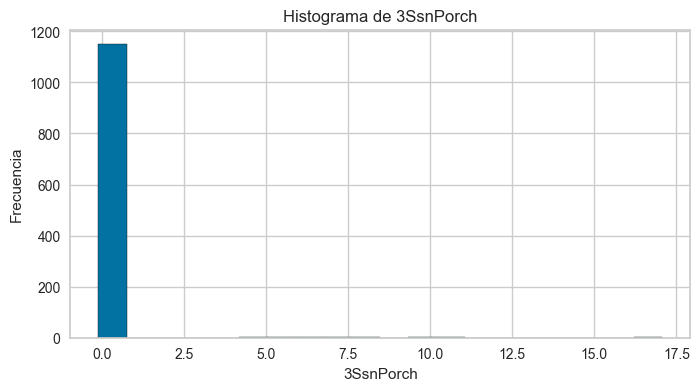

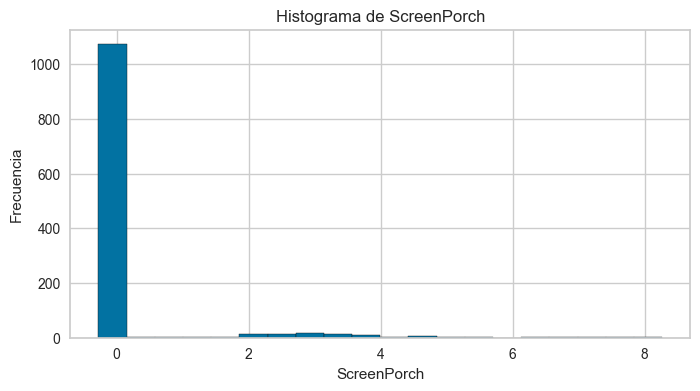

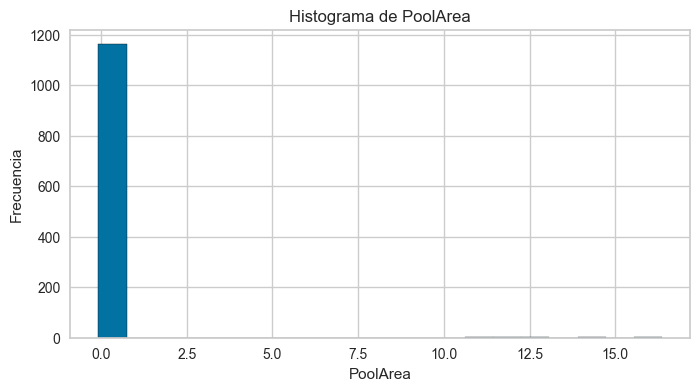

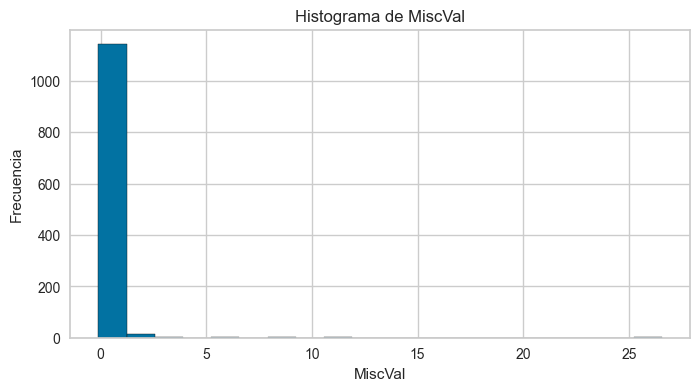

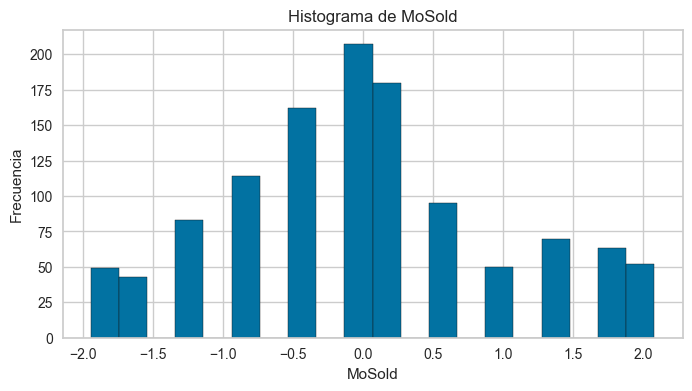

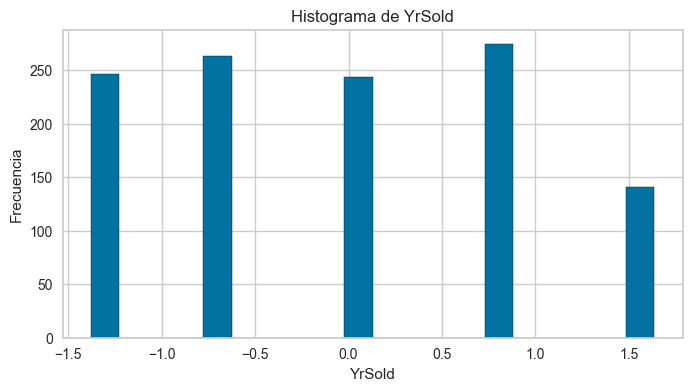

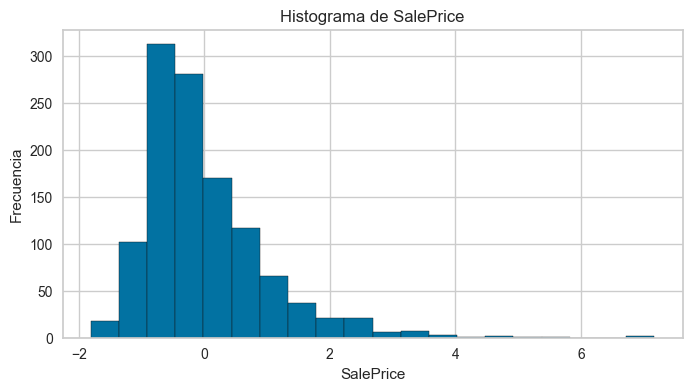

Medidas de tendencia central:
                 Id    MSSubClass   LotFrontage       LotArea   OverallQual  \
count  1.168000e+03  1.168000e+03  9.630000e+02  1.168000e+03  1.168000e+03   
mean  -8.212609e-17 -7.148011e-17 -9.591958e-17 -6.083414e-18 -2.859205e-16   
std    1.000428e+00  1.000428e+00  1.000520e+00  1.000428e+00  1.000428e+00   
min   -1.752103e+00 -8.593046e-01 -2.096859e+00 -8.986718e-01 -3.678195e+00   
25%   -8.456675e-01 -8.593046e-01 -4.482587e-01 -2.943265e-01 -7.817638e-01   
50%   -8.271154e-03 -1.593155e-01 -1.441636e-02 -1.058386e-01 -5.765585e-02   
75%    8.648350e-01  3.073440e-01  4.628102e-01  1.070318e-01  6.664521e-01   
max    1.718896e+00  3.107301e+00  1.057134e+01  2.055072e+01  2.838776e+00   

        OverallCond     YearBuilt  YearRemodAdd    MasVnrArea    BsmtFinSF1  \
count  1.168000e+03  1.168000e+03  1.168000e+03  1.161000e+03  1.168000e+03   
mean   7.148011e-17 -3.102541e-15  4.173222e-15 -2.754042e-17 -2.433366e-17   
std    1.000428e+00  

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado data_hp
numeric_columns = [col for col in train_d.columns if train_d[col].dtype != 'object']

# Calcular medidas de tendencia central
central_tendency = train_d[numeric_columns].describe()

# Crear histogramas
for column in numeric_columns:
    plt.figure(figsize=(8, 4))
    plt.hist(train_d[column], bins=20, edgecolor='k')
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()

# Mostrar medidas de tendencia central
print("Medidas de tendencia central:")
print(central_tendency)

# SETUP

Es importante mencionar que la data de train ya está normalizada

In [19]:
from pycaret.regression import*

In [20]:
dataset=setup(data=train_d,
              target='SalePrice',
              session_id=123,
              normalize=True,
              normalize_method='minmax',
              transformation=True,
              )




,Description,Value
0,Session id,123
1,Target,SalePrice
2,Target type,Regression
3,Original data shape,"(1168, 81)"
4,Transformed data shape,"(1168, 277)"
5,Transformed train set shape,"(817, 277)"
6,Transformed test set shape,"(351, 277)"
7,Ordinal features,4
8,Numeric features,37
9,Categorical features,43


## Entrenamiento de modelo

In [21]:
best=compare_models(sort='MAPE')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,12:09:32
Status,. . . . . . . . . . . . . . . . . .,Loading Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Linear Regression


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,17275.6899,937146628.1934,28857.1787,0.8484,0.1329,0.0968,1.0570
lightgbm,Light Gradient Boosting Machine,17935.1155,1025405557.9840,31060.0530,0.8426,0.1340,0.0977,1.1150
et,Extra Trees Regressor,18978.9213,1113465943.5405,32406.0903,0.8277,0.1444,0.1053,1.3110
rf,Random Forest Regressor,18972.2965,1107962064.1350,32085.0624,0.8245,0.1454,0.1067,1.5410
omp,Orthogonal Matching Pursuit,23132.5005,1382918182.4113,36099.9622,0.7921,0.1774,0.1325,0.7530
knn,K Neighbors Regressor,27829.8798,2282617522.1133,46352.5772,0.6747,0.2046,0.1492,0.8000
dt,Decision Tree Regressor,28289.8145,2157443312.1899,45683.6003,0.6622,0.2073,0.1574,0.9530
ada,AdaBoost Regressor,24687.8986,1424803750.9021,36829.2849,0.7734,0.1982,0.1585,0.9970
dummy,Dummy Regressor,59272.9909,6951340801.3509,82768.2691,-0.0092,0.4065,0.3608,0.7660
par,Passive Aggressive Regressor,453759523946.2734,168836103239508829723951104.0000,4108967096326.3706,-34126776001742996.0000,0.3746,3558898.1745,1.1400


In [22]:
tuned_best=tune_model(estimator=best)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,12:13:00
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Gradient Boosting Regressor


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,16880.0260,942939304.9812,30707.3168,0.8935,0.1263,0.0914
1,17475.9609,619309026.6596,24885.9202,0.8933,0.1306,0.1032
2,19495.7961,829411674.1352,28799.5082,0.8585,0.1394,0.1036
3,19446.2439,969497094.5371,31136.7483,0.8040,0.1597,0.1221
4,23609.7187,3912105809.5363,62546.8289,0.2433,0.2072,0.1307
5,16781.4871,782996610.9414,27982.0766,0.8938,0.1222,0.0861
6,16448.9187,551637623.2530,23486.9671,0.9246,0.1069,0.0878
7,19573.2501,921161491.5257,30350.6424,0.9086,0.1410,0.1031
8,15962.4905,551715667.2291,23488.6285,0.8955,0.1251,0.0915


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [23]:
llar=create_model('llar')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,23651.4823,1568624798.6246,39605.8682,0.8228,0.2191,0.1321
1,18387.8377,698856519.6988,26435.8945,0.8796,0.1477,0.1099
2,17777.5149,751281930.2985,27409.5226,0.8719,0.1534,0.1018
3,274044114257396.6250,6158214476905024483109017485312.0000,2481574999250481.0000,-1244757501456298541056.0000,2.8709,2149365601.9943
4,23962.3359,4088828309.3440,63943.9466,0.2091,0.2109,0.1400
5,19663.1644,1034926333.6903,32170.2710,0.8597,0.1463,0.1074
6,17469.3422,818358278.2025,28606.9621,0.8882,0.1136,0.0906
7,22412.7228,2050021136.5458,45277.1591,0.7966,0.1657,0.1114
8,17002.9831,504258935.7116,22455.7105,0.9045,0.1243,0.1006


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [24]:
final_model=finalize_model(estimator=best)

In [25]:
save_model(model=final_model,model_name='modelo1')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Id', 'MSSubClass', 'LotFrontage',
                                              'LotArea', 'OverallQual',
                                              'OverallCond', 'YearBuilt',
                                              'YearRemodAdd', 'MasVnrArea',
                                              'BsmtFinSF1', 'BsmtFinSF2',
                                              'BsmtUnfSF', 'TotalBsmtSF',
                                              '1stFlrSF', '2ndFlrSF',
                                              'LowQualFinSF', 'GrLivArea',
                                              'BsmtFullBath', 'BsmtHalfBath',
                                              'FullBath', 'Hal...
                                                                     'Heating',
                                                                     'HeatingQC',
                   

# Predicciones

In [26]:
model=load_model('modelo1')

Transformation Pipeline and Model Successfully Loaded


In [27]:
model

Pipeline(memory=FastMemory(location=C:\Users\halej\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Id', 'MSSubClass', 'LotFrontage',
                                             'LotArea', 'OverallQual',
                                             'OverallCond', 'YearBuilt',
                                             'YearRemodAdd', 'MasVnrArea',
                                             'BsmtFinSF1', 'BsmtFinSF2',
                                             'BsmtUnfSF', 'TotalBsmtSF',
                                             '1stFlrSF', '2ndFlrSF',
                                             'LowQualFinSF', 'GrLivArea',
                                             'Bsmt...
                                                                    'Heating',
                                                                    'HeatingQC',
                                                                    'Electrical',
                                                                    'KitchenQual',
                                                                    'Functional',
                                                                    'FireplaceQu',
                                                                    'GarageType', ...],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('transformation',
                 TransformerWrapper(transformer=PowerTransformer(standardize=False))),
                ('normalize', TransformerWrapper(transformer=MinMaxScaler())),
                ('actual_estimator',
                 GradientBoostingRegressor(random_state=123))])

In [29]:
predicciones=predict_model(model, data=test_d)
predicciones

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,16806.0757,963646585.7003,31042.6575,0.8348,0.1439,0.1006


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,prediction_label
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,188628.636891
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,293510.098119
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900,153549.805568
15,16,45,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,NaN,GdPrv,NaN,0,7,2007,WD,Normal,132000,147242.760404
17,18,90,RL,72.0,10791,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,Shed,500,10,2006,WD,Normal,90000,108864.808946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1432,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,10,2009,WD,Normal,143750,141997.796930
1432,1433,30,RL,60.0,10800,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,WD,Normal,64500,105725.733413
1433,1434,60,RL,93.0,10261,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2008,WD,Normal,186500,182972.652458
1446,1447,20,RL,NaN,26142,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2010,WD,Normal,157900,155721.967705
